In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from statannotations.Annotator import Annotator
from scipy.stats import tukey_hsd
from scipy import stats

plt.rc('font', family='Helvetica')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Data Dictionary

In [3]:
age_dict = {'1': '18-39',
           '2': '40-64',
           '3': '65+',
           '4': 'Undisclosed'}

gender_dict = {'1': 'Female',
           '2': 'Male',
           '3': 'Other',
           '4': 'Undisclosed'}

sex_dict = {'1': 'Female',
           '2': 'Male',
           '3': 'Intersex',
           '4': 'Undisclosed'}

income_dict = {'1': '<$100k',
           '2': '>$100k',
           '3': 'Undisclosed'}

education_dict = {'1': 'High School',
           '2': 'Baccalaureate',
           '3': 'Graduate Degree',
           '4': 'Undisclosed'}

race_dict = {'1': 'Black',
           '2': 'East Asian',
           '3': 'Indigenous',
             '4': 'Latin American',
             '5': 'Middle Eastern',
             '6': 'South Asian',
             '7': 'South East Asian',
             '8': 'White',
             '9': 'Unknown',
           '10': 'Undisclosed'}

empathy_dict = {'1': 'Very Good Empathy',
           '2': 'Good Empathy',
           '3': 'Acceptable Empathy',
           '4': 'Poor Empathy',
           '5': 'Very Poor Empathy'}

chatbot_dict = {'_phys': 'Physician',
           '_ai1': 'Claude AI v1',
           '_ai2': 'Claude AI v2.1',
           '_ai2e': 'Claude AI v2.1 Engineered'}

# Load Data

In [5]:
survey1 = pd.read_excel('Chatbot Data Extract (v01Nov2024).xlsx', sheet_name='Survey 01')
survey2 = pd.read_excel('Chatbot Data Extract (v01Nov2024).xlsx', sheet_name='Survey 02')
survey3 = pd.read_excel('Chatbot Data Extract (v01Nov2024).xlsx', sheet_name='Survey 03')
survey4 = pd.read_excel('Chatbot Data Extract (v01Nov2024).xlsx', sheet_name='Survey 04')
survey5 = pd.read_excel('Chatbot Data Extract (v01Nov2024).xlsx', sheet_name='Survey 05')
survey6 = pd.read_excel('Chatbot Data Extract (v01Nov2024).xlsx', sheet_name='Survey 06')
survey7 = pd.read_excel('Chatbot Data Extract (v01Nov2024).xlsx', sheet_name='Survey 07')
survey8 = pd.read_excel('Chatbot Data Extract (v01Nov2024).xlsx', sheet_name='Survey 08')
survey9 = pd.read_excel('Chatbot Data Extract (v01Nov2024).xlsx', sheet_name='Survey 09')
survey10 = pd.read_excel('Chatbot Data Extract (v01Nov2024).xlsx', sheet_name='Survey 10')

In [6]:
def rename_rating_col(df):

    col_name = []
    for x in range(1,11):
        for y in ['Physician', 'Claude V1', 'Claude V2', 'Claude V2 Engineered']:
            col_name.append('Q' + str(x) + '_' + y)
    
    df.columns = col_name
    
    replace_val = {5: 1,
                  4: 2,
                  3: 3,
                  2: 4,
                  1: 5}
    
    for x in df.columns:
        value_list = []
        for y in df[x]:
            try:
                value_list.append(replace_val[y])
            except:
                value_list.append(np.nan)
        df[x] = value_list
        
    return df
        

In [7]:
def rename_demo_col(df):
    df.columns = ['Age', 'Income', 'Education', 'Race', 'Gender', 'Sex']
    return df
        

In [8]:
survey1_data = survey1.iloc[:,6:].copy()
survey1_data = rename_rating_col(survey1_data)

survey2_data = survey2.iloc[:,6:].copy()
survey2_data = rename_rating_col(survey2_data)

survey3_data = survey3.iloc[:,6:].copy()
survey3_data = rename_rating_col(survey3_data)

survey4_data = survey4.iloc[:,6:].copy()
survey4_data = rename_rating_col(survey4_data)

survey5_data = survey5.iloc[:,6:].copy()
survey5_data = rename_rating_col(survey5_data)

survey6_data = survey6.iloc[:,6:].copy()
survey6_data = rename_rating_col(survey6_data)

survey7_data = survey7.iloc[:,6:].copy()
survey7_data = rename_rating_col(survey7_data)

survey8_data = survey8.iloc[:,6:].copy()
survey8_data = rename_rating_col(survey8_data)

survey9_data = survey9.iloc[:,6:].copy()
survey9_data = rename_rating_col(survey9_data)

survey10_data = survey10.iloc[:,6:].copy()
survey10_data = rename_rating_col(survey10_data)

In [9]:
survey1_demo = survey1.iloc[:,:6]
survey1_demo = rename_demo_col(survey1_demo)

survey2_demo = survey2.iloc[:,:6]
survey2_demo = rename_demo_col(survey2_demo)

survey3_demo = survey3.iloc[:,:6]
survey3_demo = rename_demo_col(survey3_demo)

survey4_demo = survey4.iloc[:,:6]
survey4_demo = rename_demo_col(survey4_demo)

survey5_demo = survey5.iloc[:,:6]
survey5_demo = rename_demo_col(survey5_demo)

survey6_demo = survey6.iloc[:,:6]
survey6_demo = rename_demo_col(survey6_demo)

survey7_demo = survey7.iloc[:,:6]
survey7_demo = rename_demo_col(survey7_demo)

survey8_demo = survey8.iloc[:,:6]
survey8_demo = rename_demo_col(survey8_demo)

survey9_demo = survey9.iloc[:,:6]
survey9_demo = rename_demo_col(survey9_demo)

survey10_demo = survey10.iloc[:,:6]
survey10_demo = rename_demo_col(survey10_demo)

In [10]:
survey_data = pd.concat([survey1_data,
           survey2_data,
          survey3_data,
          survey4_data,
          survey5_data,
          survey6_data,
          survey7_data,
          survey8_data,
          survey9_data,
          survey10_data], axis=0, ignore_index=True)

In [11]:
survey_demo = pd.concat([survey1_demo,
           survey2_demo,
          survey3_demo,
          survey4_demo,
          survey5_demo,
          survey6_demo,
          survey7_demo,
          survey8_demo,
          survey9_demo,
          survey10_demo], axis=0, ignore_index=True)

In [12]:
age_list = []
for x in survey_demo['Age']:
    try:
        age_list.append(age_dict[str(int(x))])
    except:
        age_list.append('Undisclosed')
survey_demo['Age'] = age_list

In [13]:
income_list = []
for x in survey_demo['Income']:
    try:
        income_list.append(income_dict[str(int(x))])
    except:
        income_list.append('Undisclosed')
survey_demo['Income'] = income_list

In [14]:
education_list = []
for x in survey_demo['Education']:
    try:
        education_list.append(education_dict[str(int(x))])
    except:
        education_list.append('Undisclosed')
survey_demo['Education'] = education_list

In [15]:
race_list = []
for x in survey_demo['Race']:
    try:
        race_list.append(race_dict[str(int(x))])
    except:
        race_list.append('Undisclosed')
survey_demo['Race'] = race_list

In [16]:
gender_list = []
for x in survey_demo['Gender']:
    try:
        gender_list.append(gender_dict[str(int(x))])
    except:
        gender_list.append('Undisclosed')
survey_demo['Gender'] = gender_list

In [17]:
sex_list = []
for x in survey_demo['Sex']:
    try:
        sex_list.append(sex_dict[str(int(x))])
    except:
        sex_list.append('Undisclosed')
survey_demo['Sex'] = sex_list

In [18]:
patient_survey = pd.concat([survey_demo, survey_data], axis=1)

In [19]:
patient_data = pd.DataFrame()
patient_data['Physician'] = list(survey1_data.mean()[0::4]) + list(survey2_data.mean()[0::4]) + list(survey3_data.mean()[0::4]) + list(survey4_data.mean()[0::4]) + list(survey5_data.mean()[0::4]) + list(survey6_data.mean()[0::4]) + list(survey6_data.mean()[0::4]) + list(survey7_data.mean()[0::4]) + list(survey8_data.mean()[0::4]) + list(survey9_data.mean()[0::4])
patient_data['Claude V1'] = list(survey1_data.mean()[1::4]) + list(survey2_data.mean()[1::4]) + list(survey3_data.mean()[1::4]) + list(survey4_data.mean()[1::4]) + list(survey5_data.mean()[1::4]) + list(survey6_data.mean()[1::4]) + list(survey6_data.mean()[1::4]) + list(survey7_data.mean()[1::4]) + list(survey8_data.mean()[1::4]) + list(survey9_data.mean()[1::4])
patient_data['Claude V2'] = list(survey1_data.mean()[2::4]) + list(survey2_data.mean()[2::4]) + list(survey3_data.mean()[2::4]) + list(survey4_data.mean()[2::4]) + list(survey5_data.mean()[2::4]) + list(survey6_data.mean()[2::4]) + list(survey6_data.mean()[2::4]) + list(survey7_data.mean()[2::4]) + list(survey8_data.mean()[2::4]) + list(survey9_data.mean()[2::4])
patient_data['Claude V2 with CoT'] = list(survey1_data.mean()[3::4]) + list(survey2_data.mean()[3::4]) + list(survey3_data.mean()[3::4]) + list(survey4_data.mean()[3::4]) + list(survey5_data.mean()[3::4]) + list(survey6_data.mean()[3::4]) + list(survey6_data.mean()[3::4]) + list(survey7_data.mean()[3::4]) + list(survey8_data.mean()[3::4]) + list(survey9_data.mean()[3::4])

In [20]:
patient_data

,Physician,Claude V1,Claude V2,Claude V2 with CoT
0,2.40,3.600000,4.40,5.00
1,2.60,3.600000,4.00,4.40
2,1.80,2.200000,3.80,4.40
3,1.60,3.200000,3.80,5.00
4,2.00,4.000000,3.80,4.60
...,...,...,...,...
95,2.50,3.500000,3.75,3.75
96,1.00,4.000000,3.50,3.75
97,1.00,3.000000,2.50,4.00
98,1.25,2.333333,4.00,4.25


# Demographic

In [22]:
demographic = patient_survey.iloc[:,:6]

In [23]:
def demo_print(variable):
    var_set = list(set(demographic[variable]))
    for x in var_set:
        count = demographic[variable].value_counts()[x]
        prop = demographic[variable].value_counts()[x] / len(demographic)
        print(str(x) + ': ' + str(count) + ' (' + str(round(prop * 100, 2)) + '%)')

In [24]:
demographic

,Age,Income,Education,Race,Gender,Sex
0,40-64,Undisclosed,Baccalaureate,White,Female,Female
1,65+,>$100k,Graduate Degree,White,Male,Male
2,65+,>$100k,High School,White,Male,Male
3,65+,>$100k,Baccalaureate,White,Male,Male
4,65+,<$100k,Baccalaureate,White,Male,Male
5,40-64,>$100k,Baccalaureate,White,Male,Male
6,65+,<$100k,Baccalaureate,White,Male,Male
7,18-39,>$100k,Graduate Degree,South Asian,Male,Male
8,40-64,>$100k,Graduate Degree,Indigenous,Female,Female
9,65+,>$100k,Baccalaureate,White,Female,Female


In [41]:
demo_print('Age')

18-39: 1 (2.22%)
Undisclosed: 1 (2.22%)
65+: 32 (71.11%)
40-64: 11 (24.44%)


In [44]:
demo_print('Income')

>$100k: 29 (64.44%)
Undisclosed: 6 (13.33%)
<$100k: 10 (22.22%)


In [48]:
demo_print('Education')

Graduate Degree: 18 (40.0%)
Undisclosed: 4 (8.89%)
Baccalaureate: 17 (37.78%)
High School: 6 (13.33%)


In [49]:
demo_print('Race')

White: 40 (88.89%)
Indigenous: 1 (2.22%)
Undisclosed: 2 (4.44%)
Black: 1 (2.22%)
South Asian: 1 (2.22%)


In [50]:
demo_print('Gender')

Male: 34 (75.56%)
Undisclosed: 1 (2.22%)
Female: 10 (22.22%)


In [56]:
demo_print('Sex')

Intersex: 1 (2.22%)
Male: 33 (73.33%)
Undisclosed: 1 (2.22%)
Female: 10 (22.22%)


# Load Physician Data

In [59]:
physician_raw_data = pd.read_csv('AI_Chatbot_Evaluation_Dataset.tsv', sep='\t')

In [61]:
physician_raw_data = physician_raw_data.iloc[:400, :]

In [63]:
claude_data = physician_raw_data[physician_raw_data['Key'].isin(['Claude AI Response'])]
physician_data = physician_raw_data[physician_raw_data['Key'].isin(['Physician Response'])]

In [65]:
physician_data = physician_data[['Empathy Overall Score Rater 1',
                'Empathy Overall Score Rater 2',
                'Empathy Overall Score Rater 3']]

claude_data = claude_data[['Empathy Overall Score Rater 1',
                'Empathy Overall Score Rater 2',
                'Empathy Overall Score Rater 3']]

In [67]:
phys_data = pd.DataFrame()
phys_data['Physician'] = list(physician_data.mean(axis=1))
phys_data['Claude V1'] = list(claude_data.mean(axis=1))

In [69]:
from scipy.stats import mannwhitneyu

In [71]:
U1, p = mannwhitneyu(list(phys_data['Physician']), list(patient_data['Physician']), method="exact")

In [73]:
phys_data['Physician'].mean()

2.24

In [75]:
patient_data['Physician'].mean()

2.0096666666666665

In [77]:
U1, p = mannwhitneyu(list(phys_data['Claude V1']), list(patient_data['Claude V1']), method="exact")

In [79]:
phys_data['Claude V1'].mean()

3.5099999999999993

In [81]:
patient_data['Claude V1'].mean()

3.3524999999999996

# Plot Data

In [84]:
palette = {"Physician": "#B24745",
                        "Claude V1": "#79AF97",
                      "Claude V2": "#6A6599",
                      "Claude V2 with CoT": "#80796B"}

### Patient Rating: Claude V1 vs. Physician Responses

p-value annotation legend:
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Physician vs. Claude V1: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.644e-17 Stat=2.300e+01


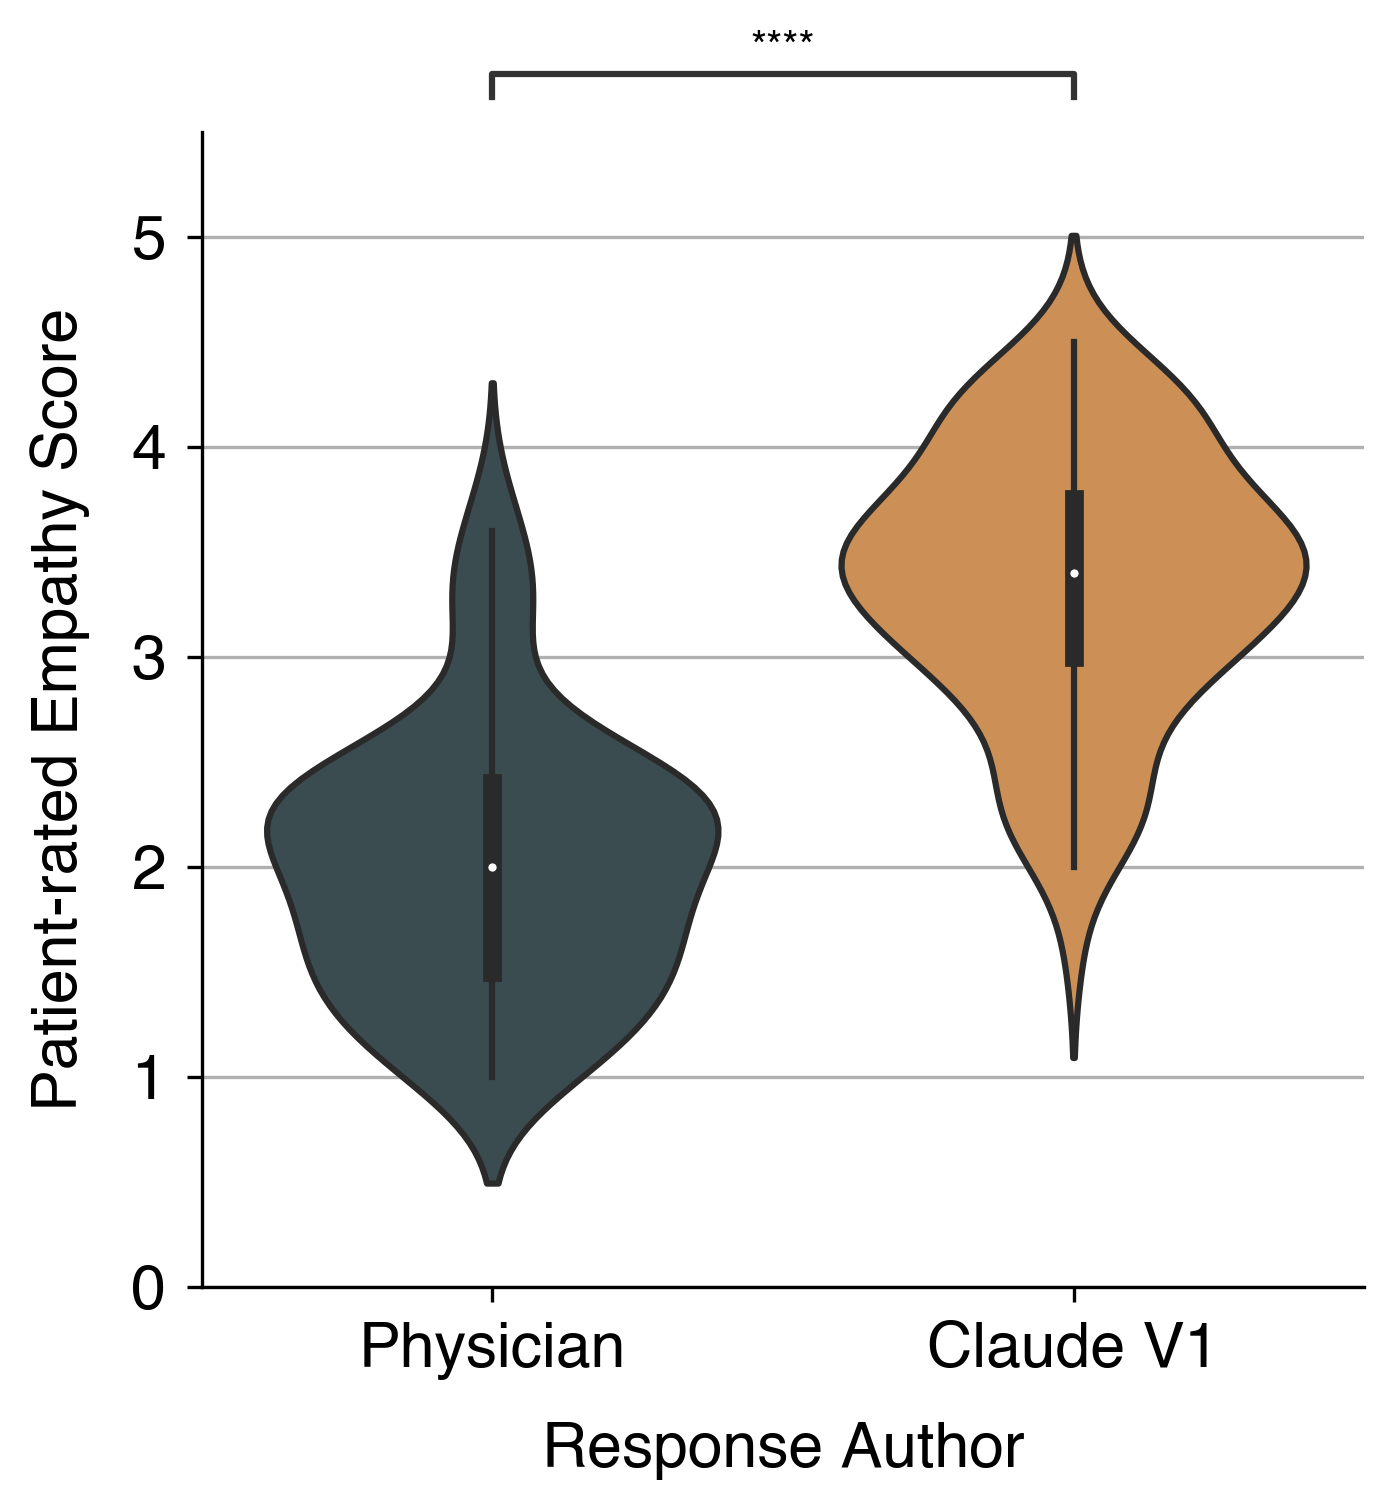

In [288]:
plot_df = pd.DataFrame()
plot_df['Physician'] = patient_data['Physician']
plot_df['Claude V1'] = patient_data['Claude V1']
plot_df = plot_df.melt()

fig, ax = plt.subplots(1, 1, figsize=(5,5))
sns.violinplot(data=plot_df,
               x='variable',
               y='value',
              ax=ax,
              palette=palette,
               zorder=3)
ax.tick_params(axis ='both', which ='major',  
               labelsize = 15, pad = 5,  
               colors ='black') 
ax.set_xlabel('Response Author', size=15, labelpad=10)
ax.set_ylabel('Patient-rated Empathy Score', size=15, labelpad=10)
ax.set_ylim(0,5.5)
ax.spines[['right', 'top']].set_visible(False)
ax.set_axisbelow(True)
ax.grid(axis='y', zorder=0) 

annotator = Annotator(ax, [("Physician", "Claude V1")], data=plot_df, x='variable', y='value', order=['Physician', 'Claude V1'])
annotator.configure(test='Wilcoxon', text_format='star', loc='outside', comparisons_correction="BH",
                    hide_non_significant=True,
    pvalue_thresholds=[[1e-4, "****"], [1e-3, "***"], [1e-2, "**"], [0.05, "*"]])
annotator.apply_and_annotate()

plt.show()


### Physician vs. Patient Rating: Physician Responses

Physician vs. Patient: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:5.823e-04 Stat=1.354e+03


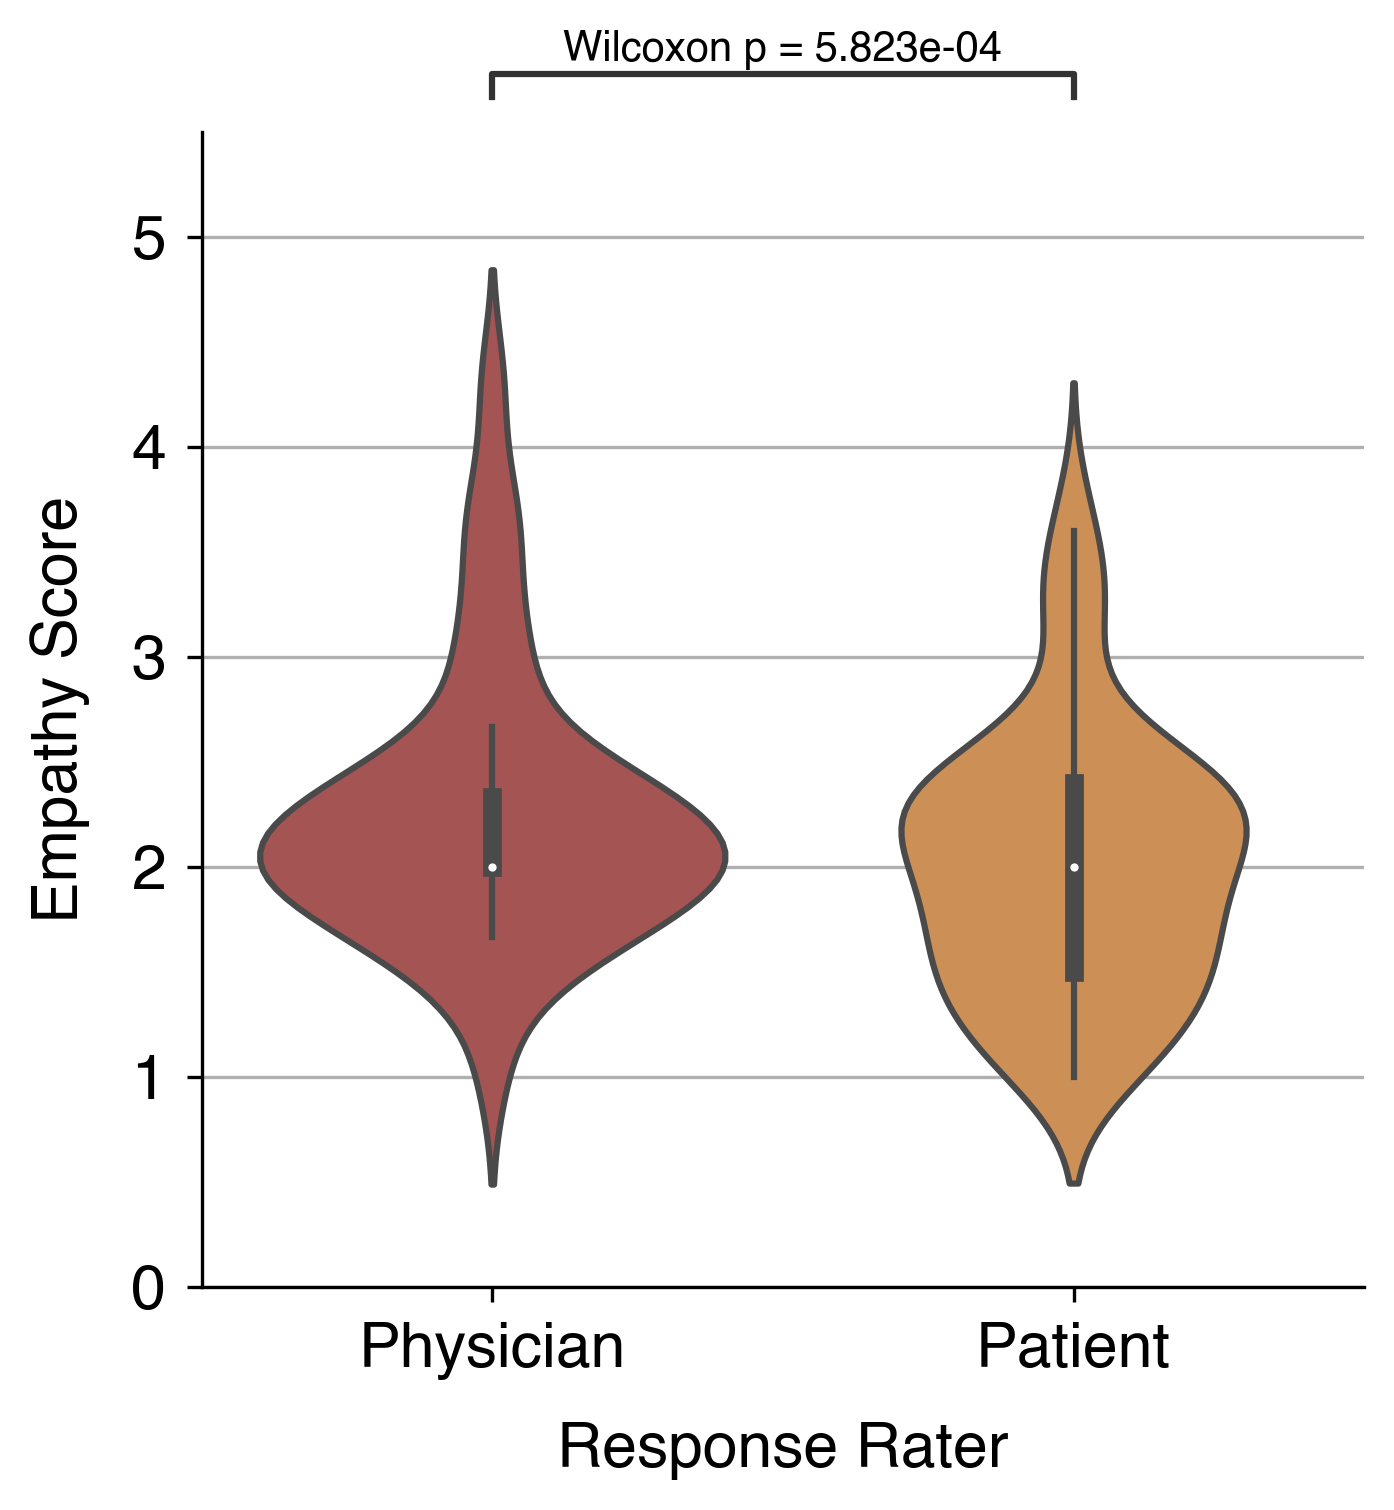

In [678]:
plot_df = pd.DataFrame()
plot_df['Physician'] = phys_data['Physician']
plot_df['Patient'] = patient_data['Physician']
plot_df = plot_df.melt()

fig, ax = plt.subplots(1, 1, figsize=(5,5))
sns.violinplot(data=plot_df,
               x='variable',
               y='value',
              ax=ax,
              palette={"Physician": "#B24745",
        "Patient": "#DF8F44"},
               zorder=3)
ax.tick_params(axis ='both', which ='major',  
               labelsize = 15, pad = 5,  
               colors ='black') 
ax.set_xlabel('Response Rater', size=15, labelpad=10)
ax.set_ylabel('Empathy Score', size=15, labelpad=10)
ax.set_ylim(0,5.5)
ax.spines[['right', 'top']].set_visible(False)
ax.set_axisbelow(True)
ax.grid(axis='y', zorder=0) 

annotator = Annotator(ax, [("Physician", "Patient")], data=plot_df, x='variable', y='value', order=['Physician', 'Patient'])
annotator.configure(test='Wilcoxon', text_format='full', loc='outside', comparisons_correction="BH",
                    hide_non_significant=True,
    pvalue_thresholds=[[1e-3, "p < 0.001"], [1e-2, "**"], [0.05, "*"]])
annotator.apply_and_annotate()

plt.show()

fig.savefig('Figure 2A Patient vs Physician Rating of Physician Response.svg', format='svg', dpi=300, bbox_inches='tight')

### Physician vs. Patient Rating: ClaudeV1 Responses

Physician vs. Patient: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:2.137e-03 Stat=1.454e+03


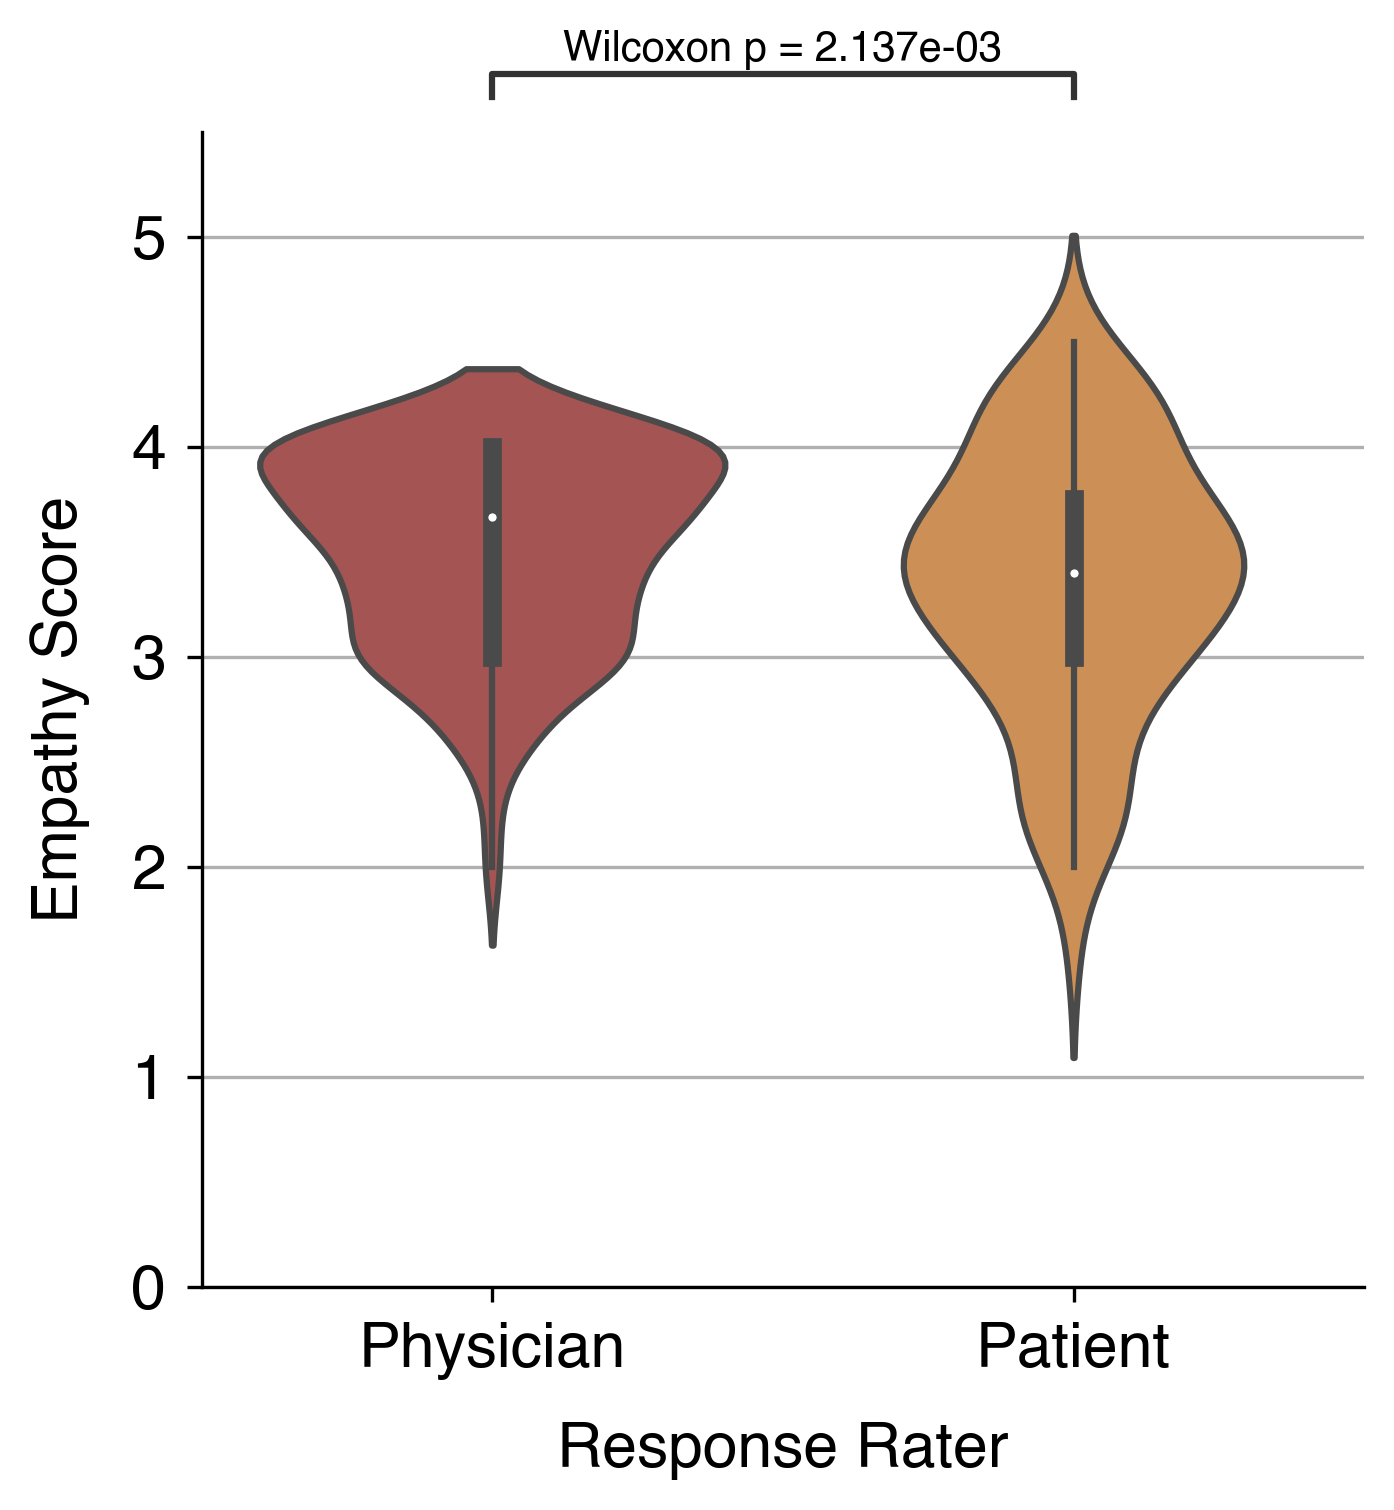

In [680]:
plot_df = pd.DataFrame()
plot_df['Physician'] = phys_data['Claude V1']
plot_df['Patient'] = patient_data['Claude V1']
plot_df = plot_df.melt()

fig, ax = plt.subplots(1, 1, figsize=(5,5))
sns.violinplot(data=plot_df,
               x='variable',
               y='value',
              ax=ax,
              palette={"Physician": "#B24745",
        "Patient": "#DF8F44"})
ax.tick_params(axis ='both', which ='major',  
               labelsize = 15, pad = 5,  
               colors ='black') 
ax.set_xlabel('Response Rater', size=15, labelpad=10)
ax.set_ylabel('Empathy Score', size=15, labelpad=10)
ax.set_ylim(0,5.5)
ax.spines[['right', 'top']].set_visible(False)

annotator = Annotator(ax, [("Physician", "Patient")], data=plot_df, x='variable', y='value', order=['Physician', 'Patient'])
annotator.configure(test='Wilcoxon', text_format='full', loc='outside', comparisons_correction="BH",
                    hide_non_significant=True,
    pvalue_thresholds=[[1e-3, "p < 0.001"], [1e-2, "**"], [0.05, "*"]])
annotator.apply_and_annotate()

ax.set_axisbelow(True)
ax.grid(axis='y', zorder=0) 

plt.show()
fig.savefig('Figure 2B Patient vs Physician Rating of ClaudeV1 Response.svg', format='svg', dpi=300, bbox_inches='tight')

# Physician vs. Patient Rating: Physician and ClaudeV1 Responses

In [203]:
plot_df1 = pd.DataFrame()
plot_df1['Physician'] = phys_data['Physician']
plot_df1['Patient'] = patient_data['Physician']
plot_df1 = plot_df1.melt()
plot_df1['Response Author'] = 'Physician'

plot_df2 = pd.DataFrame()
plot_df2['Physician'] = phys_data['Claude V1']
plot_df2['Patient'] = patient_data['Claude V1']
plot_df2 = plot_df2.melt()
plot_df2['Response Author'] = 'Claude V1'

In [205]:
joint_df = pd.concat([plot_df1, plot_df2]).reset_index(drop=True)

In [207]:
res = tukey_hsd(phys_data['Physician'], phys_data['Claude V1'], patient_data['Physician'], patient_data['Claude V1'])

In [88]:
from statistics import NormalDist

def confidence_interval(data, confidence=0.95):
  dist = NormalDist.from_samples(data)
  z = NormalDist().inv_cdf((1 + confidence) / 2.)
  h = dist.stdev * z / ((len(data) - 1) ** .5)
  return dist.mean - h, dist.mean + h

In [211]:
print(confidence_interval(phys_data['Physician']))
print(np.mean(phys_data['Physician']))

(2.1137221754698006, 2.3662778245302)
2.24


In [334]:
# Physician rating of physician responses

print(confidence_interval(phys_data['Physician']))
print(np.mean(phys_data['Physician']))

# Physician rating of Claude VI responses

print(confidence_interval(phys_data['Claude V1']))
print(np.mean(phys_data['Claude V1']))

# Patient rating of physician responses

print(confidence_interval(patient_data['Physician']))
print(np.mean(patient_data['Physician']))

# Patient rating of Claude VI responses

print(confidence_interval(patient_data['Claude V1']))
print(np.mean(patient_data['Claude V1']))

(2.1137221754698006, 2.3662778245302)
2.24
(3.4178683811071005, 3.602131618892899)
3.5099999999999993
(1.884599816221147, 2.134733517112186)
2.0096666666666665
(3.226933426480533, 3.478066573519467)
3.3524999999999996


Patient_Physician vs. Patient_Claude V1: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.644e-17 Stat=2.300e+01
Physician_Physician vs. Physician_Claude V1: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:8.205e-17 Stat=8.150e+01
Physician_Physician vs. Patient_Physician: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:5.823e-04 Stat=1.354e+03
Physician_Claude V1 vs. Patient_Claude V1: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:2.137e-03 Stat=1.454e+03


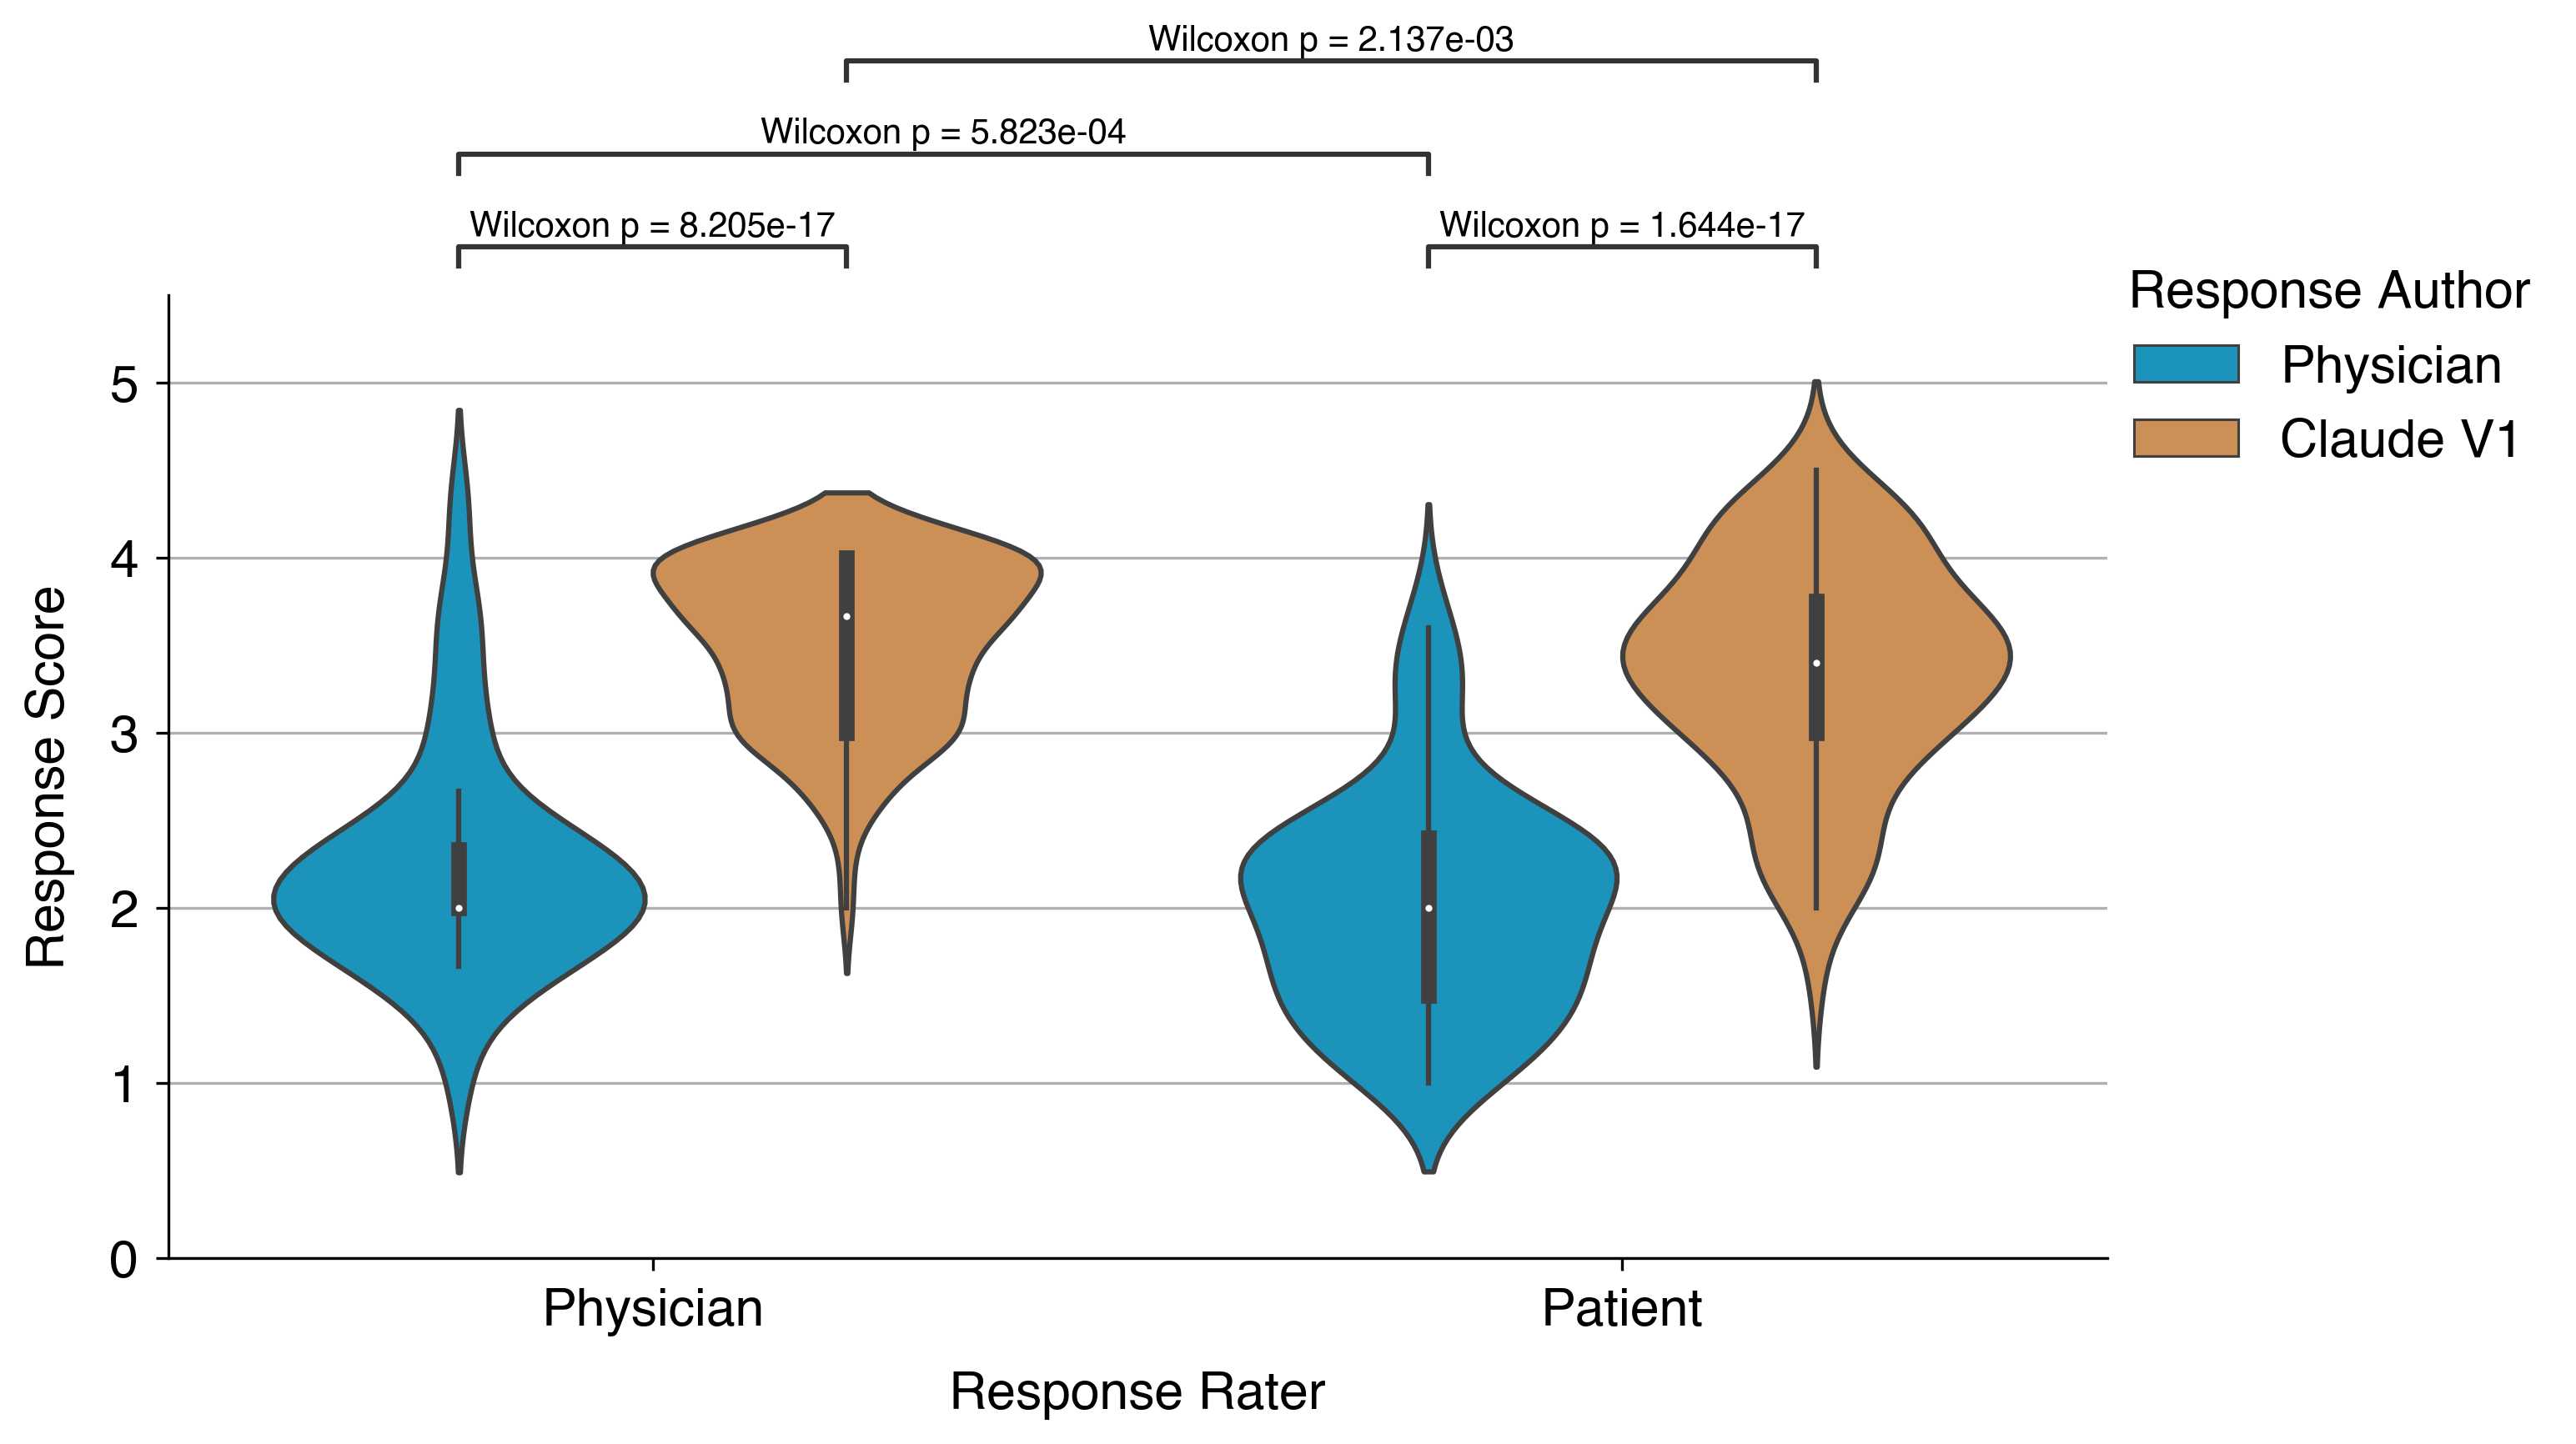

In [316]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.violinplot(data=joint_df,
               x='variable',
               y='value',
               hue = 'Response Author',
               hue_order = ['Physician', 'Claude V1'],
              ax=ax,
              palette={"Physician": "#00A1D5",
        "Claude V1": "#DF8F44"},
               
               zorder=3)
ax.tick_params(axis ='both', which ='major',  
               labelsize = 15, pad = 5,  
               colors ='black') 
ax.set_xlabel('Response Rater', size=15, labelpad=10)
ax.set_ylabel('Response Score', size=15, labelpad=10)
ax.set_ylim(0,5.5)
ax.spines[['right', 'top']].set_visible(False)
ax.set_axisbelow(True)
ax.grid(axis='y', zorder=0) 
ax.legend(frameon=False, loc=(1,0.8), prop={'size': 15}, title='Response Author', title_fontsize=15)

pairs = [
    (("Physician", "Physician"), ("Physician", "Claude V1")),
    (("Patient", "Physician"), ("Patient", "Claude V1")),
(("Physician", "Physician"), ("Patient", "Physician")),
(("Physician", "Claude V1"), ("Patient", "Claude V1"))]


annotator = Annotator(ax, pairs, data=joint_df, x='variable', y='value', hue = 'Response Author', order=['Physician', 'Patient'],
                     hue_order = ['Physician', 'Claude V1'])
annotator.configure(test='Wilcoxon', text_format='full', loc='outside', comparisons_correction="BH",
                    hide_non_significant=True
    )

annotator.apply_and_annotate()

plt.show()


### Patient Rating Comparison

In [320]:
patient_plot_data = patient_data.melt()


In [322]:
# Physician

print(confidence_interval(patient_plot_data[patient_plot_data['variable'] == 'Physician']['value']))
print(np.mean(patient_plot_data[patient_plot_data['variable'] == 'Physician']['value']))

# Claude V1

print(confidence_interval(patient_plot_data[patient_plot_data['variable'] == 'Claude V1']['value']))
print(np.mean(patient_plot_data[patient_plot_data['variable'] == 'Claude V1']['value']))

# Claude V2

print(confidence_interval(patient_plot_data[patient_plot_data['variable'] == 'Claude V2']['value']))
print(np.mean(patient_plot_data[patient_plot_data['variable'] == 'Claude V2']['value']))

# Claude V2 with CoT

print(confidence_interval(patient_plot_data[patient_plot_data['variable'] == 'Claude V2 with CoT']['value']))
print(np.mean(patient_plot_data[patient_plot_data['variable'] == 'Claude V2 with CoT']['value']))

(1.884599816221147, 2.134733517112186)
2.0096666666666665
(3.226933426480533, 3.478066573519467)
3.3524999999999996
(3.6189300884175086, 3.8120699115824914)
3.7155
(3.9930503751376722, 4.219949624862327)
4.1065


p-value annotation legend:
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
p < 0.001: p <= 1.00e-03

Physician vs. Claude V1: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.644e-17 Stat=2.300e+01
Claude V1 vs. Claude V2: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:6.416e-06 Stat=1.009e+03
Claude V2 vs. Claude V2 with CoT: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:2.175e-08 Stat=6.800e+02
Physician vs. Claude V2: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:8.137e-18 Stat=0.000e+00
Claude V1 vs. Claude V2 with CoT: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:9.447e-11 Stat=5.570e+02
Physician vs. Claude V2 with CoT: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:5.101e-18 Stat=9.500e+00


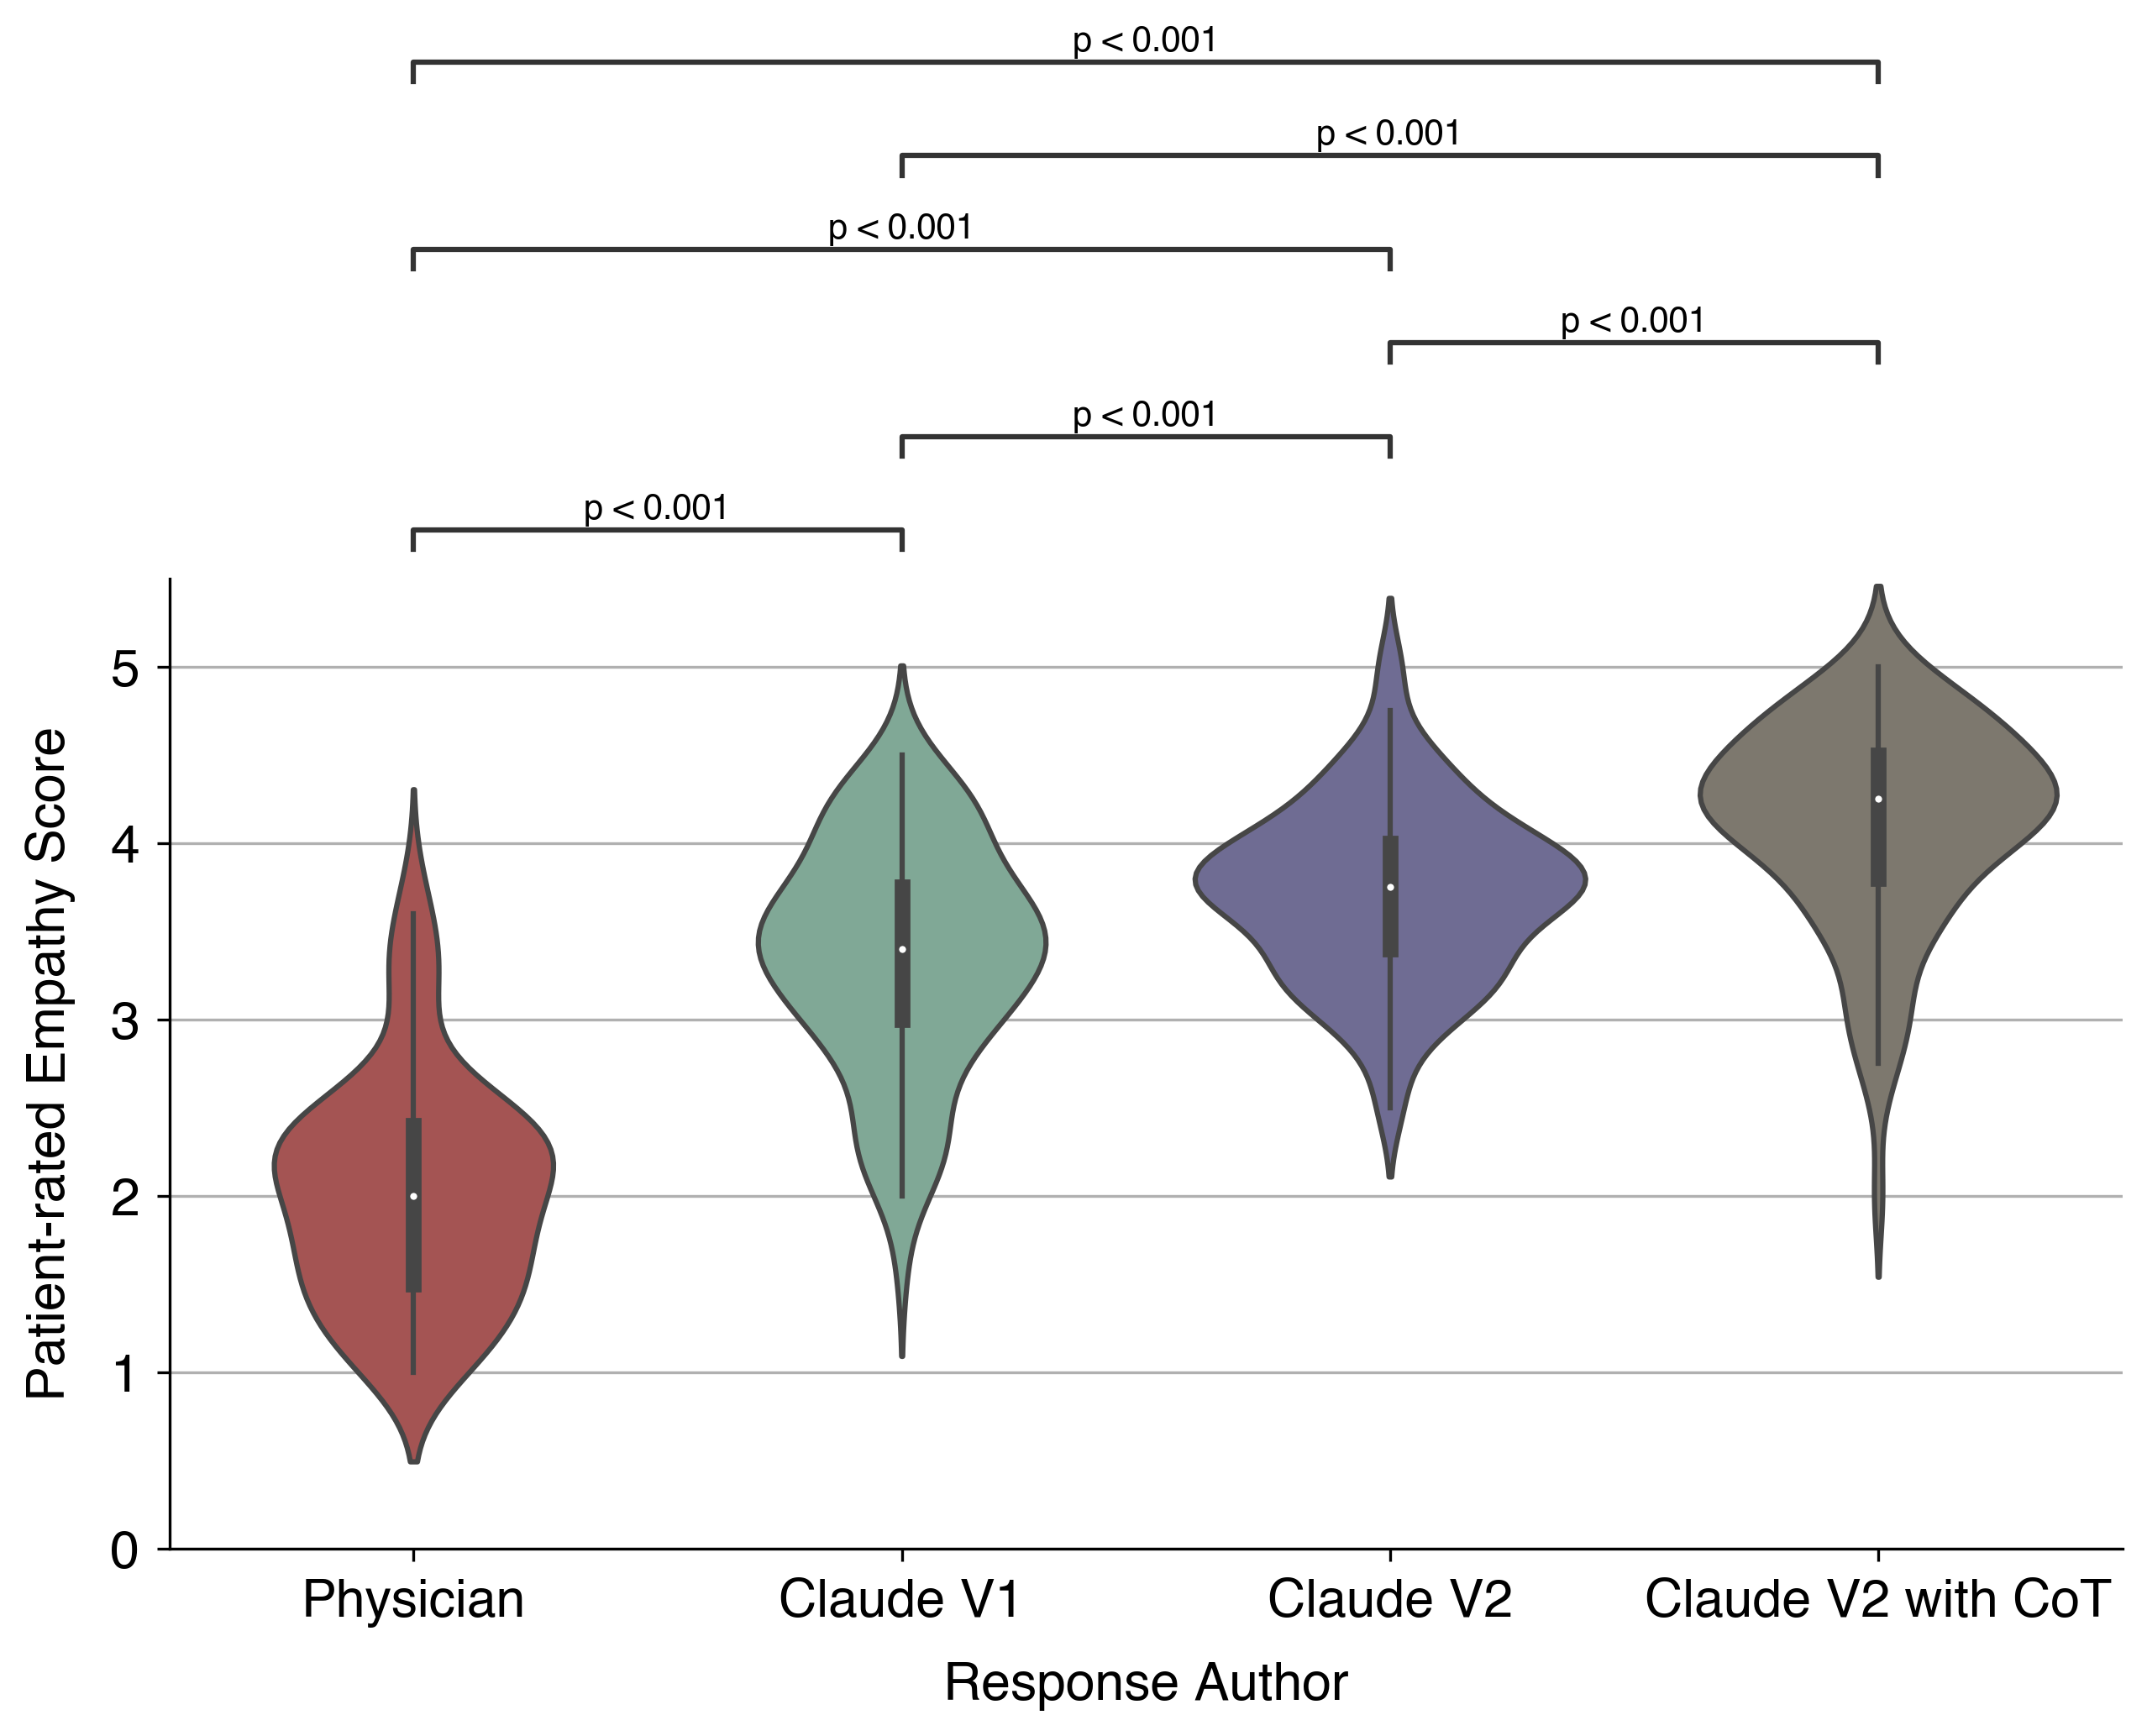

In [682]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.violinplot(data=patient_plot_data,
               x='variable',
               y='value',
              ax=ax,
              palette={"Physician": "#B24745",
                        "Claude V1": "#79AF97",
                      "Claude V2": "#6A6599",
                      "Claude V2 with CoT": "#80796B"})
ax.tick_params(axis ='both', which ='major',  
               labelsize = 15, pad = 5,  
               colors ='black') 
ax.set_xlabel('Response Author', size=15, labelpad=10)
ax.set_ylabel('Patient-rated Empathy Score', size=15, labelpad=10)
ax.set_ylim(0,5.5)
ax.spines[['right', 'top']].set_visible(False)

pairs = list(itertools.combinations(['Physician', 'Claude V1', 'Claude V2', 'Claude V2 with CoT'], 2))

annotator = Annotator(ax, pairs, data=patient_plot_data, x='variable', y='value', 
                      order=['Physician', 'Claude V1', 'Claude V2', 'Claude V2 with CoT'])
annotator.configure(test='Wilcoxon', text_format='star', loc='outside', comparisons_correction="BH",
    pvalue_thresholds=[[1e-3, "p < 0.001"], [1e-2, "**"], [0.05, "*"]])
annotator.apply_and_annotate()

ax.set_axisbelow(True)
ax.grid(axis='y', zorder=0) 

plt.show()
fig.savefig('Figure 1 Patient Rating of Physician and Chatbot Response.svg', format='svg', dpi=300, bbox_inches='tight')

# Word Count

In [100]:
word_df = pd.read_excel('Empathy_Chatbot_Dataset_3_26_2024.xlsx')

In [102]:
word_df.columns = ['Question', 'Physician', 'Claude V1', 'Claude V2', 'Claude V2 with CoT']

In [104]:
word_count_df = pd.DataFrame()
word_count_df['Physician'] = [len(x.split(' ')) for x in word_df['Physician']]
word_count_df['Claude V1'] = [len(x.split(' ')) for x in word_df['Claude V1']]
word_count_df['Claude V2'] = [len(x.split(' ')) for x in word_df['Claude V2']]
word_count_df['Claude V2 with CoT'] = [len(x.split(' ')) for x in word_df['Claude V2 with CoT']]

In [110]:
word_count_df = word_count_df.iloc[:100]

In [116]:
word_count_df = word_count_df.melt()

In [118]:
# Physician

print(confidence_interval(word_count_df[word_count_df['variable'] == 'Physician']['value']))
print(np.mean(word_count_df[word_count_df['variable'] == 'Physician']['value']))

# Claude V1

print(confidence_interval(word_count_df[word_count_df['variable'] == 'Claude V1']['value']))
print(np.mean(word_count_df[word_count_df['variable'] == 'Claude V1']['value']))

# Claude V2

print(confidence_interval(word_count_df[word_count_df['variable'] == 'Claude V2']['value']))
print(np.mean(word_count_df[word_count_df['variable'] == 'Claude V2']['value']))

# Claude V2 with CoT

print(confidence_interval(word_count_df[word_count_df['variable'] == 'Claude V2 with CoT']['value']))
print(np.mean(word_count_df[word_count_df['variable'] == 'Claude V2 with CoT']['value']))

(74.34154628459149, 125.0784537154085)
99.71
(183.35255383365728, 201.5474461663427)
192.45
(147.45706397158304, 157.16293602841696)
152.31
(183.08336816138802, 190.35663183861197)
186.72


p-value annotation legend:
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
p < 0.001: p <= 1.00e-03

Physician vs. Claude V1: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:8.273e-12 Stat=5.375e+02
Claude V1 vs. Claude V2: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:6.153e-11 Stat=6.230e+02
Claude V2 vs. Claude V2 with CoT: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:7.004e-17 Stat=9.750e+01
Physician vs. Claude V2: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.661e-08 Stat=8.580e+02
Physician vs. Claude V2 with CoT: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.050e-11 Stat=5.475e+02


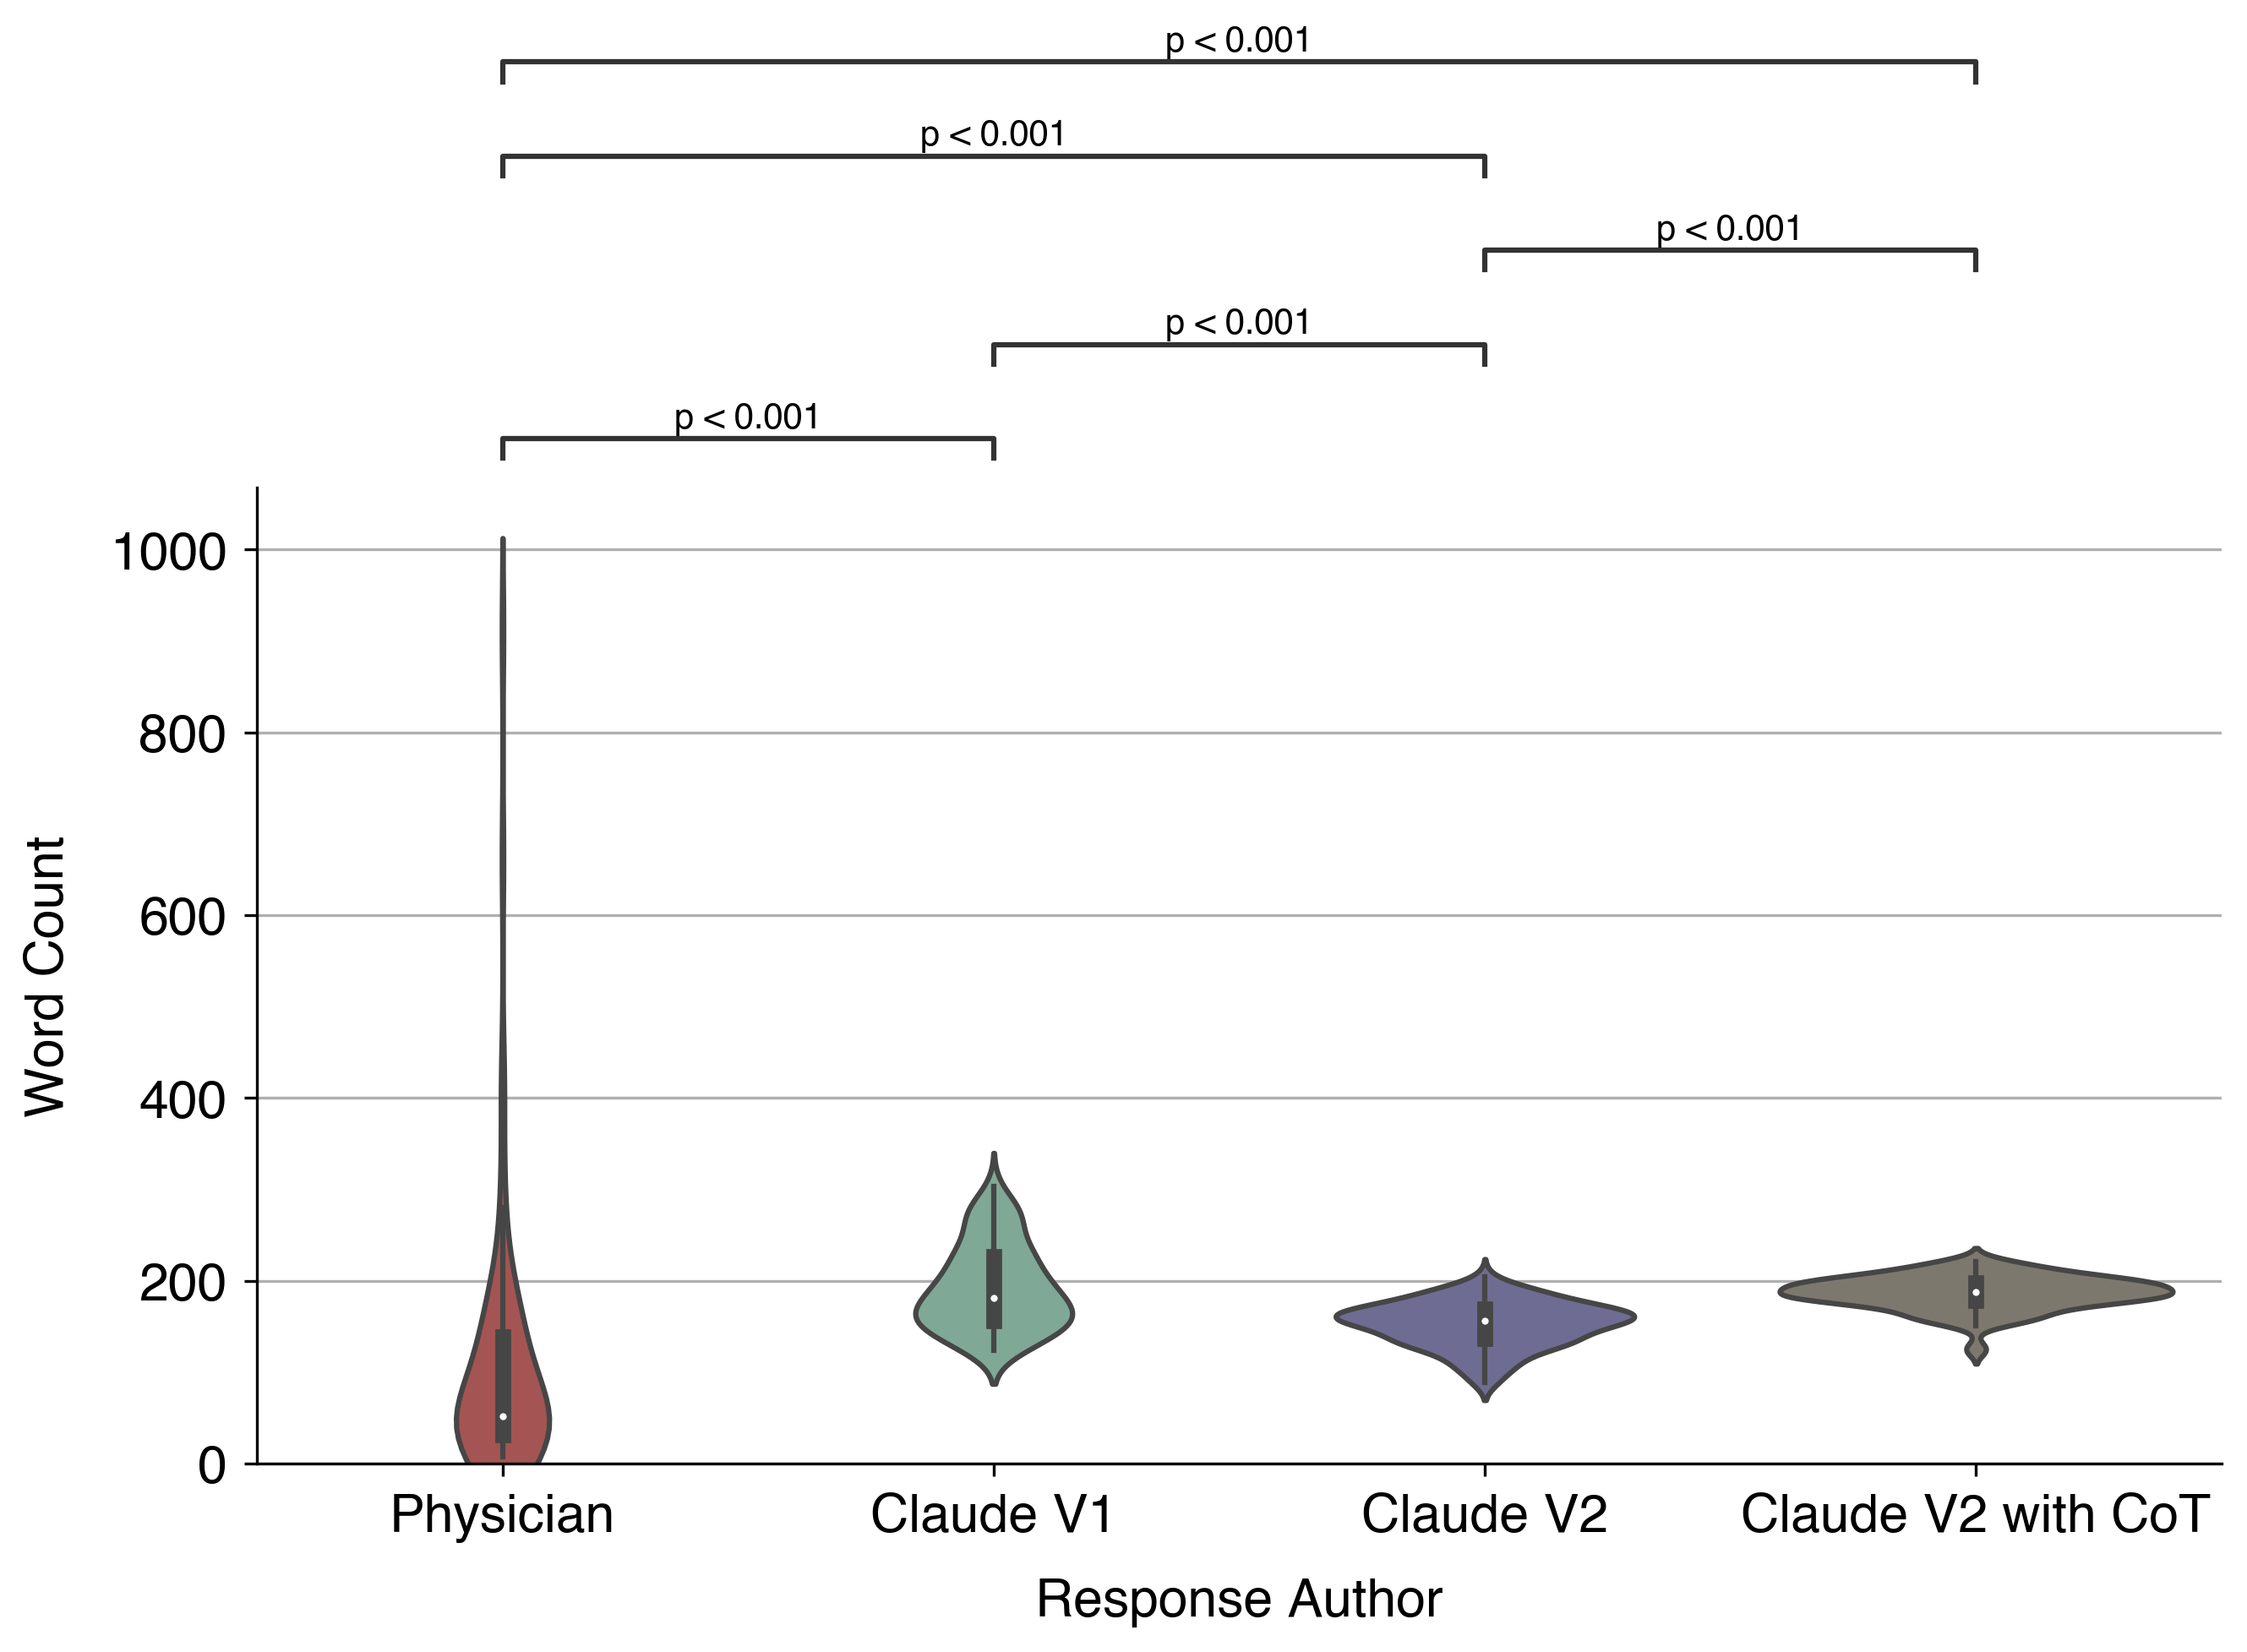

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.violinplot(data=word_count_df,
               x='variable',
               y='value',
              ax=ax,
              palette={"Physician": "#B24745",
                        "Claude V1": "#79AF97",
                      "Claude V2": "#6A6599",
                      "Claude V2 with CoT": "#80796B"})
ax.tick_params(axis ='both', which ='major',  
               labelsize = 15, pad = 5,  
               colors ='black') 
ax.set_xlabel('Response Author', size=15, labelpad=10)
ax.set_ylabel('Word Count', size=15, labelpad=10)
ax.spines[['right', 'top']].set_visible(False)
ax.set_ylim(0,)
pairs = list(itertools.combinations(['Physician', 'Claude V1', 'Claude V2', 'Claude V2 with CoT'], 2))

annotator = Annotator(ax, pairs, data=word_count_df, x='variable', y='value', 
                      order=['Physician', 'Claude V1', 'Claude V2', 'Claude V2 with CoT'])
annotator.configure(test='Wilcoxon', text_format='star', loc='outside', comparisons_correction="BH", hide_non_significant=True,
    pvalue_thresholds=[[1e-3, "p < 0.001"], [1e-2, "**"], [0.05, "*"]])
annotator.apply_and_annotate()

ax.set_axisbelow(True)
ax.grid(axis='y', zorder=0) 

plt.show()

fig.savefig('SupFigure1 Word Count.svg', format='svg', dpi=300, bbox_inches='tight')

# Correlation of Patient-rated and Physician-rated Empathy

In [188]:
# Physician

print(confidence_interval(phys_data['Physician']))
print(np.mean(phys_data['Physician']))

# Claude V1

print(confidence_interval(phys_data['Physician']))
print(np.mean(phys_data['Claude V1']))

(2.1137221754698006, 2.3662778245302)
2.24
(2.1137221754698006, 2.3662778245302)
3.5099999999999993


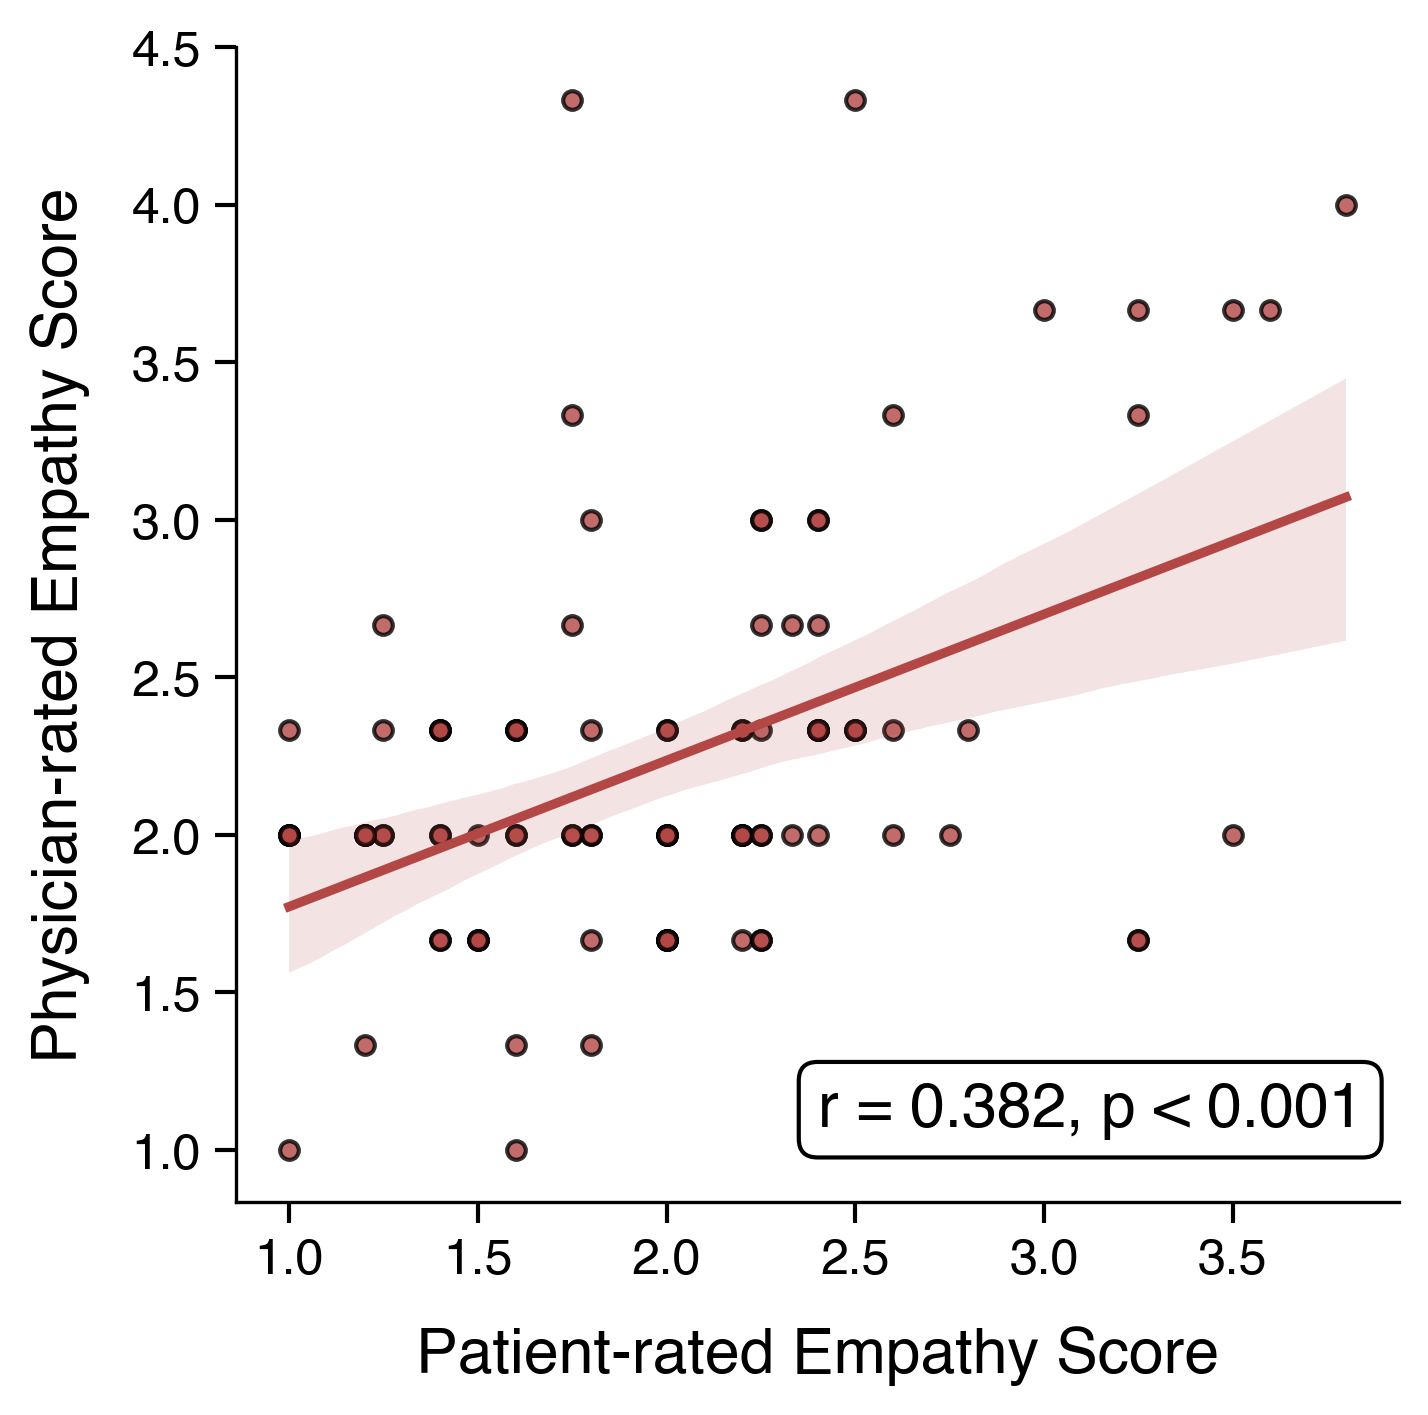

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

x = patient_data['Physician']
y = phys_data['Physician']
sns.regplot(x = x,
                    y = y,
                   color=palette['Physician'],
                marker="o",
               scatter_kws={'s':20, 'edgecolor':'black', 'linewidths':1})

r, p = stats.spearmanr(x,
                         y)

if p < 0.001:
    ax.annotate(f'r = {r:.3f}, p < 0.001',
                        xy=(0.5, 0.08), xycoords='axes fraction',
                        ha='left', va='center', size=15,
                        bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'black', 'linewidth':1})
else:
    ax.annotate(f'r = {r:.3f}, p = {p:.3f}',
                        xy=(0.5, 0.08), xycoords='axes fraction',
                        ha='left', va='center', size=15,
                        bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'black', 'linewidth':1})

ax.set_xlabel('Patient-rated Empathy Score', size=15, labelpad=10)
ax.set_ylabel('Physician-rated Empathy Score', size=15, labelpad=10)
ax.spines[['right', 'top']].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=12, width=1, length=5)
plt.show()
fig.savefig('SupFigure4A Corr Physician vs. Patient Empathy of Physician Response.svg', format='svg', dpi=300)

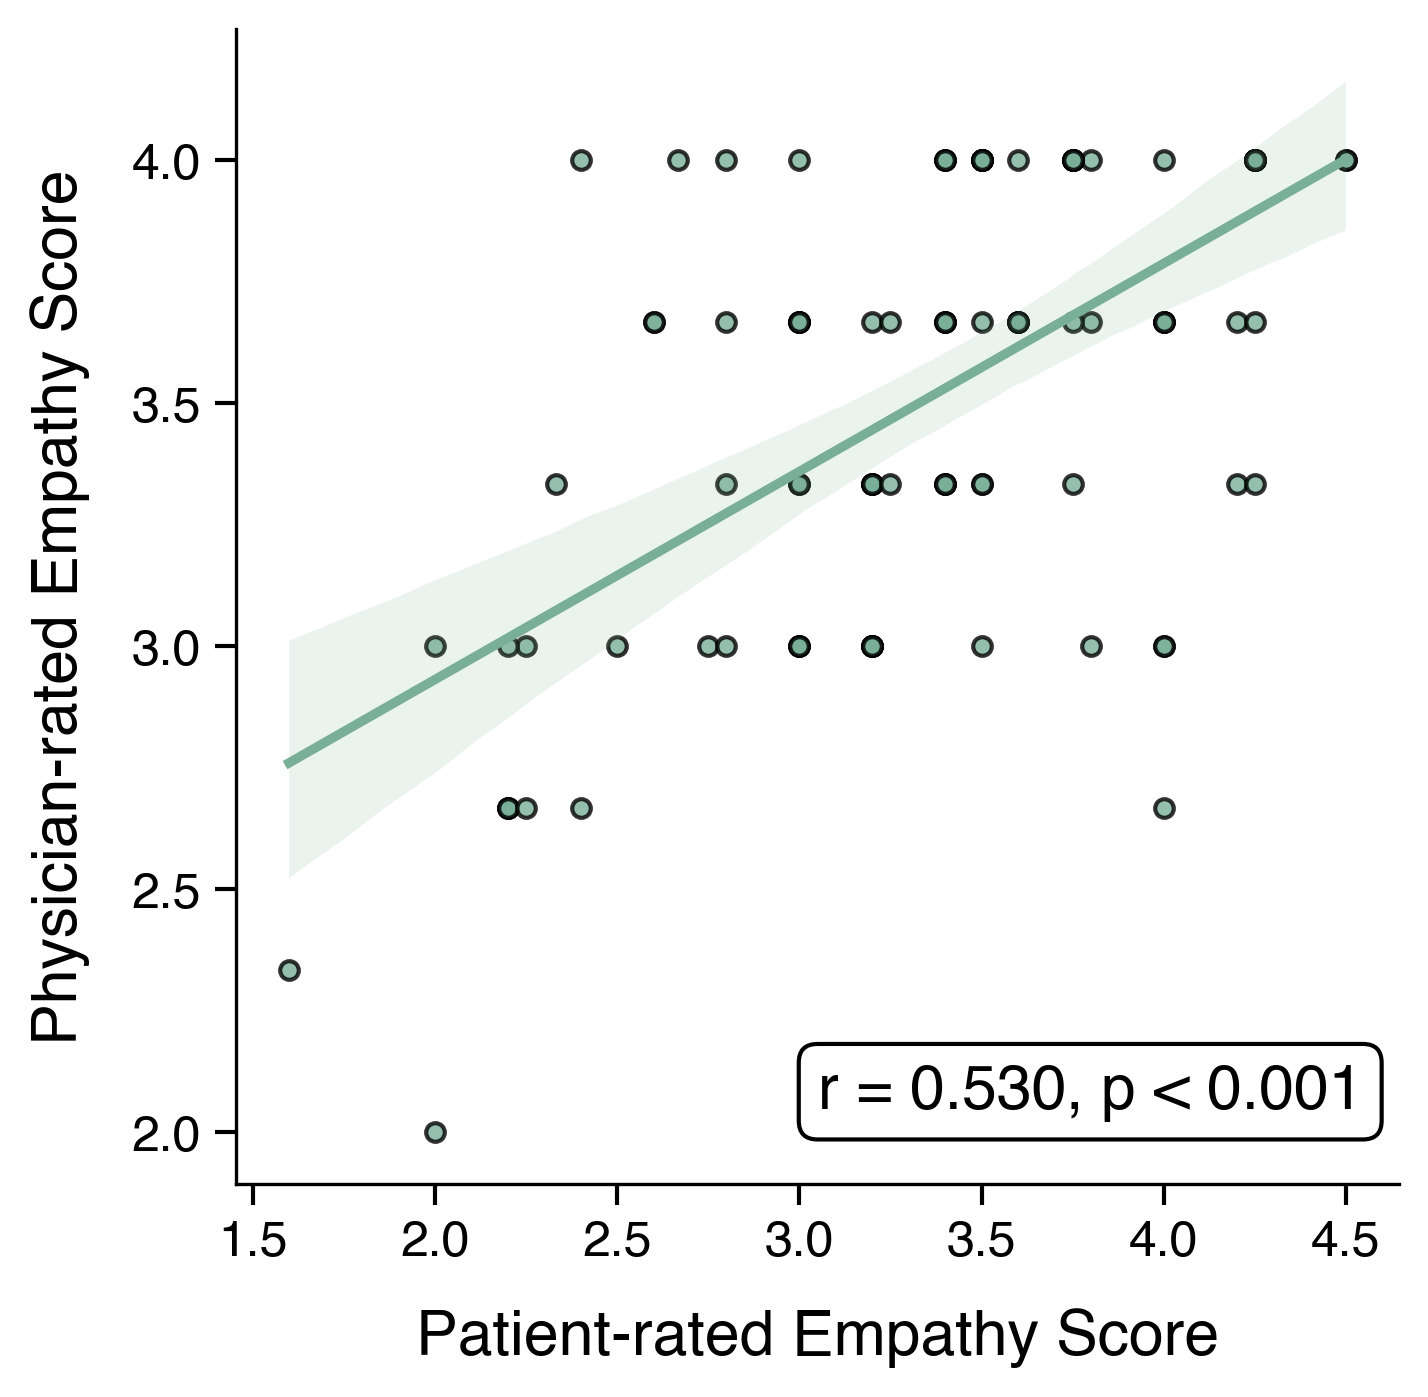

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

x = patient_data['Claude V1']
y = phys_data['Claude V1']
sns.regplot(x = x,
                    y = y,
                   color=palette['Claude V1'],
                marker="o",
               scatter_kws={'s':20, 'edgecolor':'black', 'linewidths':1})

r, p = stats.spearmanr(x,
                         y)

if p < 0.001:
    ax.annotate(f'r = {r:.3f}, p < 0.001',
                        xy=(0.5, 0.08), xycoords='axes fraction',
                        ha='left', va='center', size=15,
                        bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'black', 'linewidth':1})
else:
    ax.annotate(f'r = {r:.3f}, p = {p:.3f}',
                        xy=(0.5, 0.08), xycoords='axes fraction',
                        ha='left', va='center', size=15,
                        bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'black', 'linewidth':1})

ax.set_xlabel('Patient-rated Empathy Score', size=15, labelpad=10)
ax.set_ylabel('Physician-rated Empathy Score', size=15, labelpad=10)
ax.spines[['right', 'top']].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=12, width=1, length=5)
plt.show()
fig.savefig('SupFigure4B Corr Physician vs. Patient Empathy of ClaudeV1 Response.svg', format='svg', dpi=300)

# Correlation of Empathy and Word Count

In [166]:
word_df = pd.read_excel('Empathy_Chatbot_Dataset_3_26_2024.xlsx')
word_df = word_df.iloc[:100].copy()
word_df.columns = ['Question', 'Physician', 'Claude V1', 'Claude V2', 'Claude V2 with CoT']

word_count_df = pd.DataFrame()
word_count_df['Physician'] = [len(x.split(' ')) for x in word_df['Physician']]
word_count_df['Claude V1'] = [len(x.split(' ')) for x in word_df['Claude V1']]
word_count_df['Claude V2'] = [len(x.split(' ')) for x in word_df['Claude V2']]
word_count_df['Claude V2 with CoT'] = [len(x.split(' ')) for x in word_df['Claude V2 with CoT']]

In [168]:
word_count_df

,Physician,Claude V1,Claude V2,Claude V2 with CoT
0,152,196,169,198
1,218,180,161,181
2,413,151,138,198
3,55,150,156,178
4,161,163,108,168
...,...,...,...,...
95,104,262,144,206
96,73,278,131,159
97,662,303,168,177
98,152,273,137,176


In [170]:
patient_data

,Physician,Claude V1,Claude V2,Claude V2 with CoT
0,2.40,3.600000,4.40,5.00
1,2.60,3.600000,4.00,4.40
2,1.80,2.200000,3.80,4.40
3,1.60,3.200000,3.80,5.00
4,2.00,4.000000,3.80,4.60
...,...,...,...,...
95,2.50,3.500000,3.75,3.75
96,1.00,4.000000,3.50,3.75
97,1.00,3.000000,2.50,4.00
98,1.25,2.333333,4.00,4.25


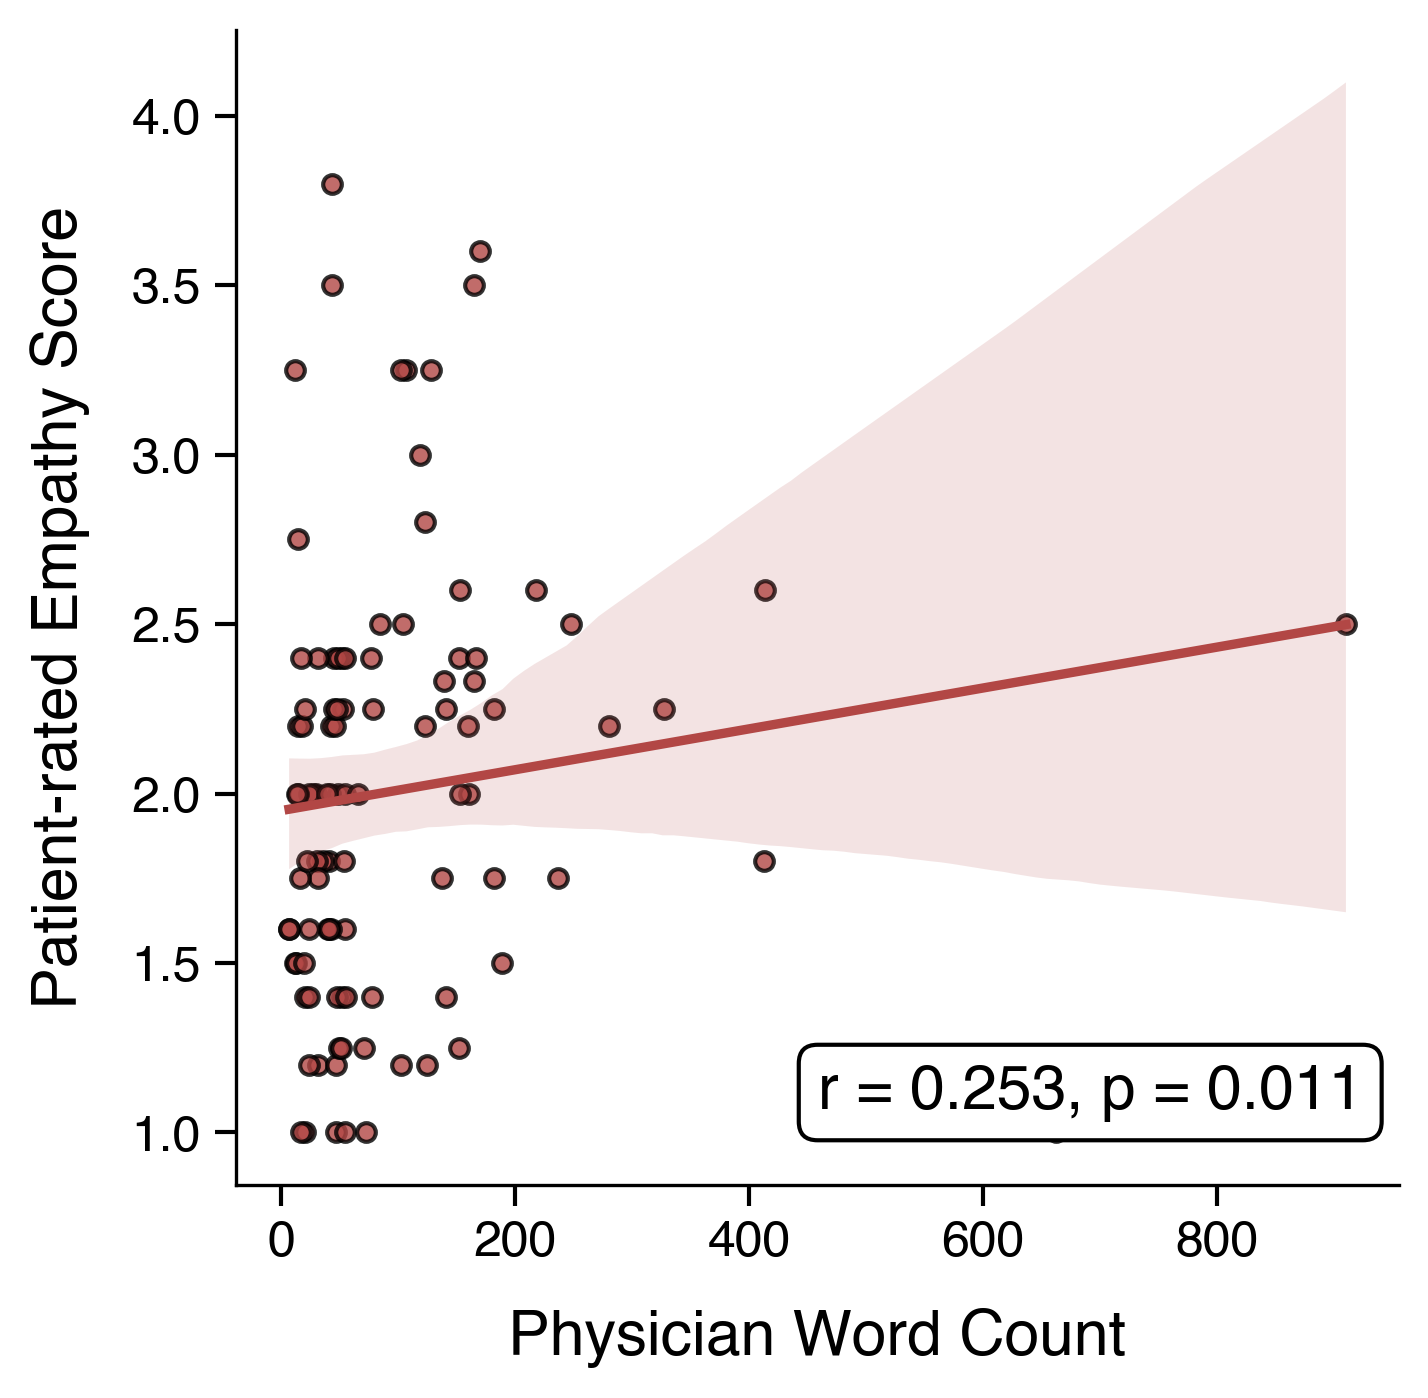

In [172]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

x = word_count_df['Physician']
y = patient_data['Physician']
sns.regplot(x = x,
                    y = y,
                   color=palette['Physician'],
                marker="o",
               scatter_kws={'s':20, 'edgecolor':'black', 'linewidths':1})

r, p = stats.spearmanr(x,
                         y)

ax.annotate(f'r = {r:.3f}, p = {p:.3f}',
                        xy=(0.5, 0.08), xycoords='axes fraction',
                        ha='left', va='center', size=15,
                        bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'black', 'linewidth':1})

ax.set_xlabel('Physician Word Count', size=15, labelpad=10)
ax.set_ylabel('Patient-rated Empathy Score', size=15, labelpad=10)
ax.spines[['right', 'top']].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=12, width=1, length=5)

plt.show()
fig.savefig('SupFigure2A Corr Physician Word Count vs. Patient Empathy.svg', format='svg', dpi=300)

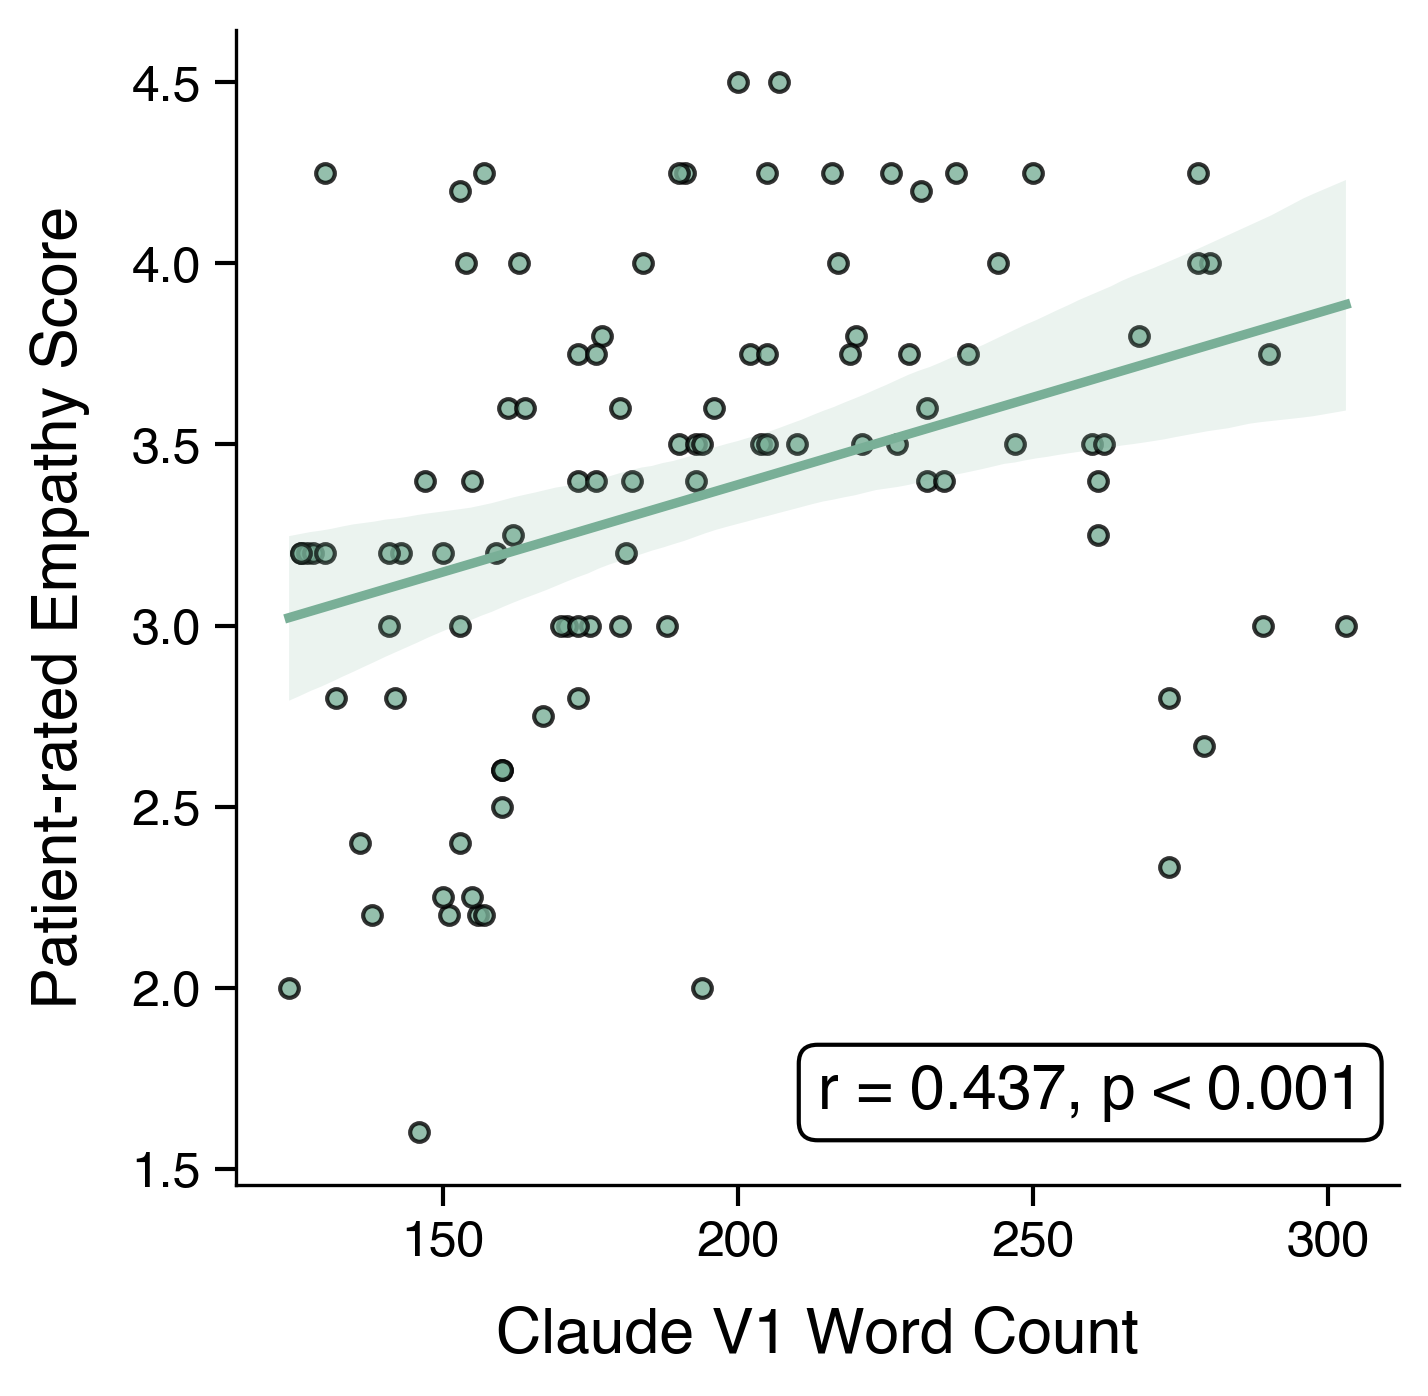

In [174]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

x = word_count_df['Claude V1']
y = patient_data['Claude V1']
sns.regplot(x = x,
                    y = y,
                   color=palette['Claude V1'],
                marker="o",
               scatter_kws={'s':20, 'edgecolor':'black', 'linewidths':1})

r, p = stats.spearmanr(x,
                         y)

if p < 0.001:
    ax.annotate(f'r = {r:.3f}, p < 0.001',
                        xy=(0.5, 0.08), xycoords='axes fraction',
                        ha='left', va='center', size=15,
                        bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'black', 'linewidth':1})
else:
    ax.annotate(f'r = {r:.3f}, p = {p:.3f}',
                        xy=(0.5, 0.08), xycoords='axes fraction',
                        ha='left', va='center', size=15,
                        bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'black', 'linewidth':1})

ax.set_xlabel('Claude V1 Word Count', size=15, labelpad=10)
ax.set_ylabel('Patient-rated Empathy Score', size=15, labelpad=10)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12, width=1, length=5)

plt.show()
fig.savefig('SupFigure2B Corr Claude V1 Word Count vs. Patient Empathy.svg', format='svg', dpi=300)

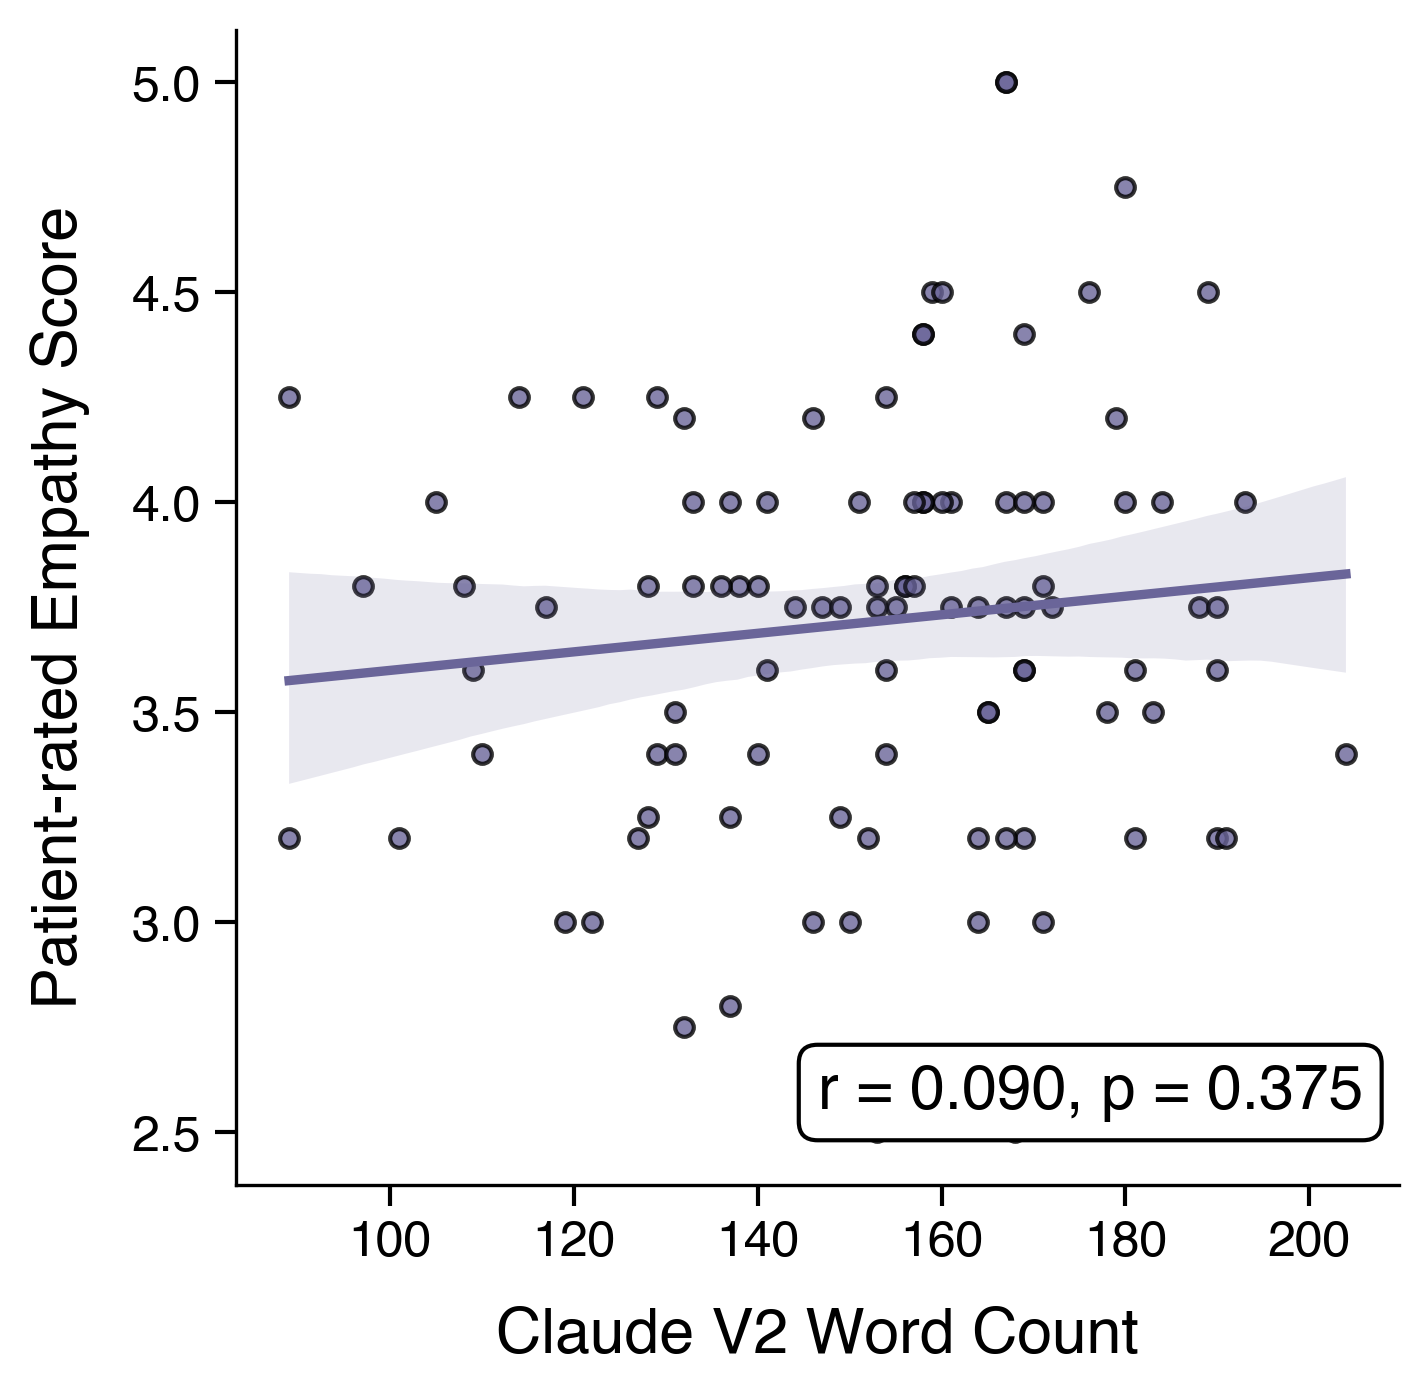

In [176]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

x = word_count_df['Claude V2']
y = patient_data['Claude V2']
sns.regplot(x = x,
                    y = y,
                   color=palette['Claude V2'],
                marker="o",
               scatter_kws={'s':20, 'edgecolor':'black', 'linewidths':1})

r, p = stats.spearmanr(x,
                         y)

if p < 0.001:
    ax.annotate(f'r = {r:.3f}, p < 0.001',
                        xy=(0.5, 0.08), xycoords='axes fraction',
                        ha='left', va='center', size=15,
                        bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'black', 'linewidth':1})
else:
    ax.annotate(f'r = {r:.3f}, p = {p:.3f}',
                        xy=(0.5, 0.08), xycoords='axes fraction',
                        ha='left', va='center', size=15,
                        bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'black', 'linewidth':1})

ax.set_xlabel('Claude V2 Word Count', size=15, labelpad=10)
ax.set_ylabel('Patient-rated Empathy Score', size=15, labelpad=10)
ax.spines[['right', 'top']].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=12, width=1, length=5)

plt.show()
fig.savefig('SupFigure2C Corr ClaudeV2 Word Count vs. Patient Empathy.svg', format='svg', dpi=300)

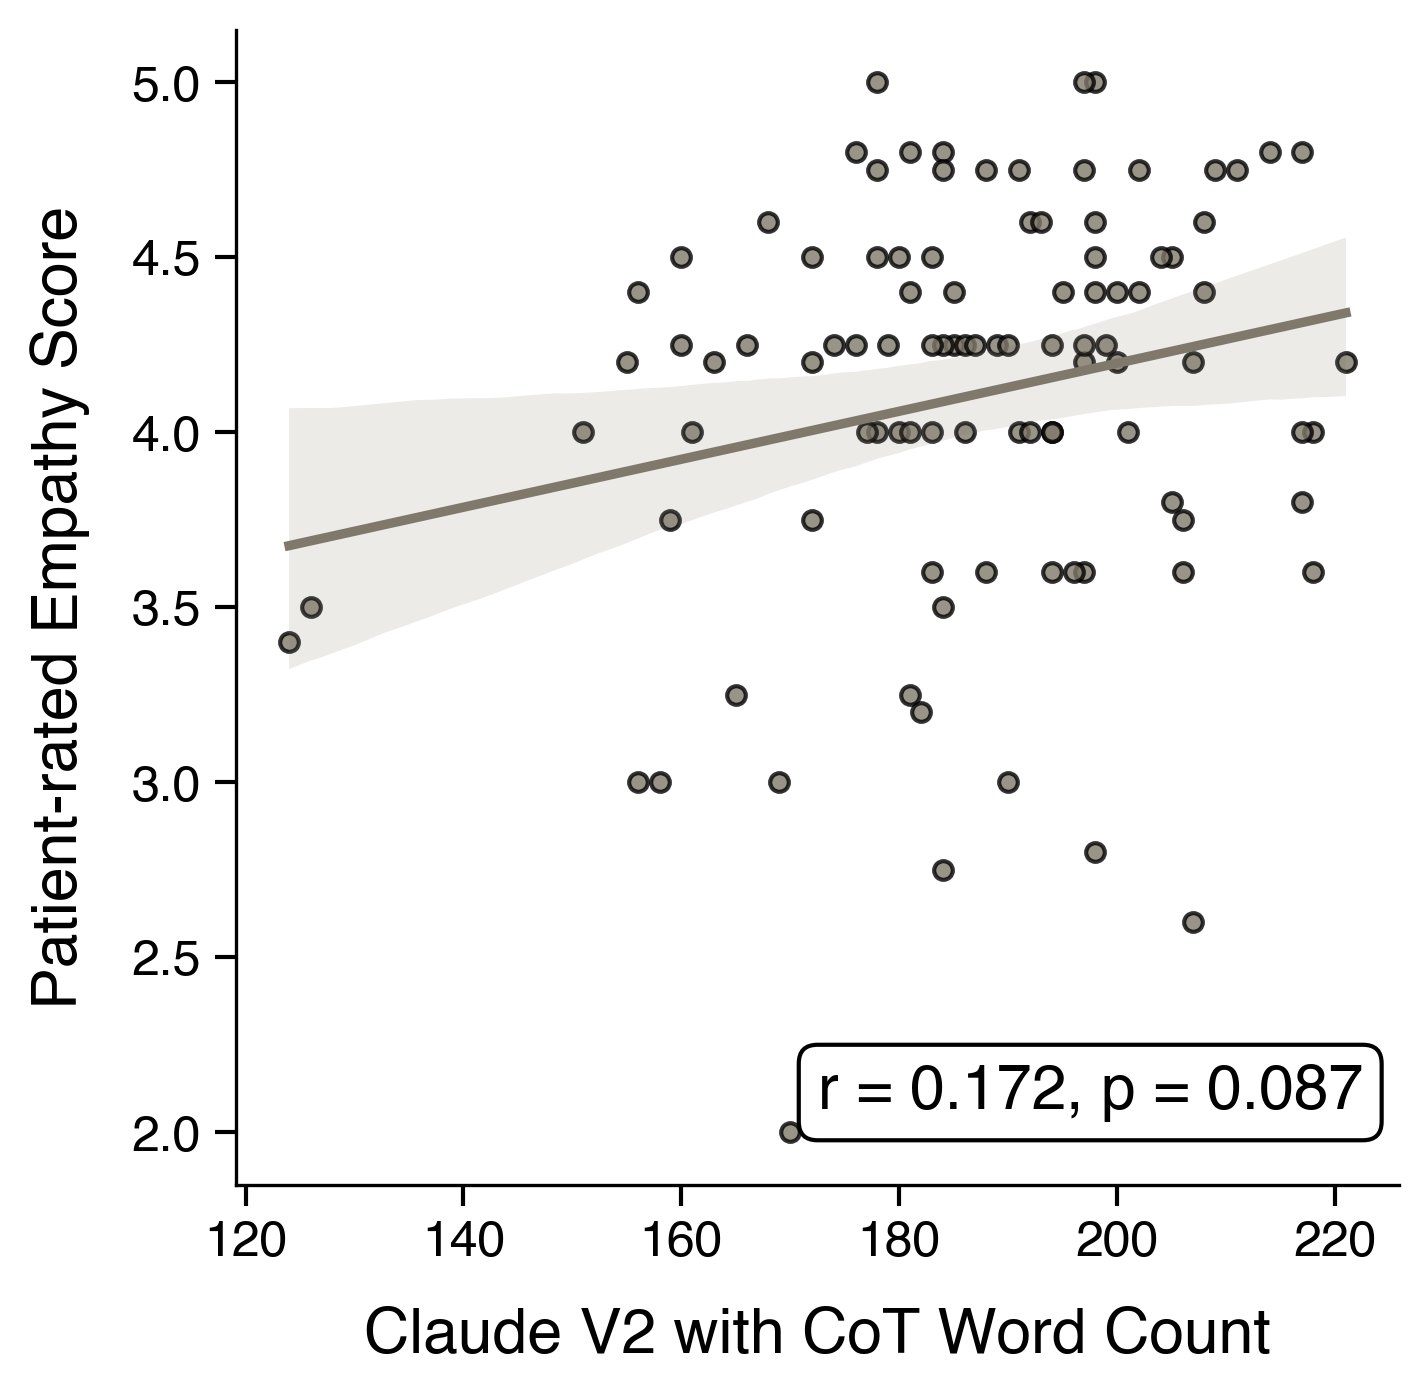

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

x = word_count_df['Claude V2 with CoT']
y = patient_data['Claude V2 with CoT']
sns.regplot(x = x,
                    y = y,
                   color=palette['Claude V2 with CoT'],
                marker="o",
               scatter_kws={'s':20, 'edgecolor':'black', 'linewidths':1})

r, p = stats.spearmanr(x,
                         y)

if p < 0.001:
    ax.annotate(f'r = {r:.3f}, p < 0.001',
                        xy=(0.5, 0.08), xycoords='axes fraction',
                        ha='left', va='center', size=15,
                        bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'black', 'linewidth':1})
else:
    ax.annotate(f'r = {r:.3f}, p = {p:.3f}',
                        xy=(0.5, 0.08), xycoords='axes fraction',
                        ha='left', va='center', size=15,
                        bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'black', 'linewidth':1})

ax.set_xlabel('Claude V2 with CoT Word Count', size=15, labelpad=10)
ax.set_ylabel('Patient-rated Empathy Score', size=15, labelpad=10)
ax.spines[['right', 'top']].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=12, width=1, length=5)

plt.show()
fig.savefig('SupFigure2D Corr ClaudeV2CoT Word Count vs. Patient Empathy.svg', format='svg', dpi=300)

# Correlation of Empathy and Readability

In [84]:
import textstat

In [86]:
readability_df = word_df
for x in word_df.index:
    for y in word_df.columns:
        readability_df.loc[x,y] = float(textstat.flesch_kincaid_grade(readability_df.loc[x,y]))

In [126]:
readability_df = readability_df.iloc[:100,1:]

In [136]:
readability_df_melt = readability_df.melt()

In [146]:
readability_df_melt['value'] = readability_df_melt['value'].astype(float)

In [180]:
# Physician

print(confidence_interval(readability_df_melt[readability_df_melt['variable'] == 'Physician']['value']))
print(np.mean(readability_df_melt[readability_df_melt['variable'] == 'Physician']['value']))

# Claude V1

print(confidence_interval(readability_df_melt[readability_df_melt['variable'] == 'Claude V1']['value']))
print(np.mean(readability_df_melt[readability_df_melt['variable'] == 'Claude V1']['value']))

# Claude V2

print(confidence_interval(readability_df_melt[readability_df_melt['variable'] == 'Claude V2']['value']))
print(np.mean(readability_df_melt[readability_df_melt['variable'] == 'Claude V2']['value']))

# Claude V2 with CoT

print(confidence_interval(readability_df_melt[readability_df_melt['variable'] == 'Claude V2 with CoT']['value']))
print(np.mean(readability_df_melt[readability_df_melt['variable'] == 'Claude V2 with CoT']['value']))

(7.497113260253308, 8.764886739746693)
8.131
(9.191034633697614, 10.128965366302387)
9.66
(8.486424973009878, 9.083575026990122)
8.785
(8.271846603286564, 8.824153396713436)
8.548


p-value annotation legend:
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
p < 0.001: p <= 1.00e-03

Physician vs. Claude V1: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:8.273e-12 Stat=5.375e+02
Claude V1 vs. Claude V2: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:6.153e-11 Stat=6.230e+02
Claude V2 vs. Claude V2 with CoT: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:7.004e-17 Stat=9.750e+01
Physician vs. Claude V2: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.661e-08 Stat=8.580e+02
Physician vs. Claude V2 with CoT: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.050e-11 Stat=5.475e+02


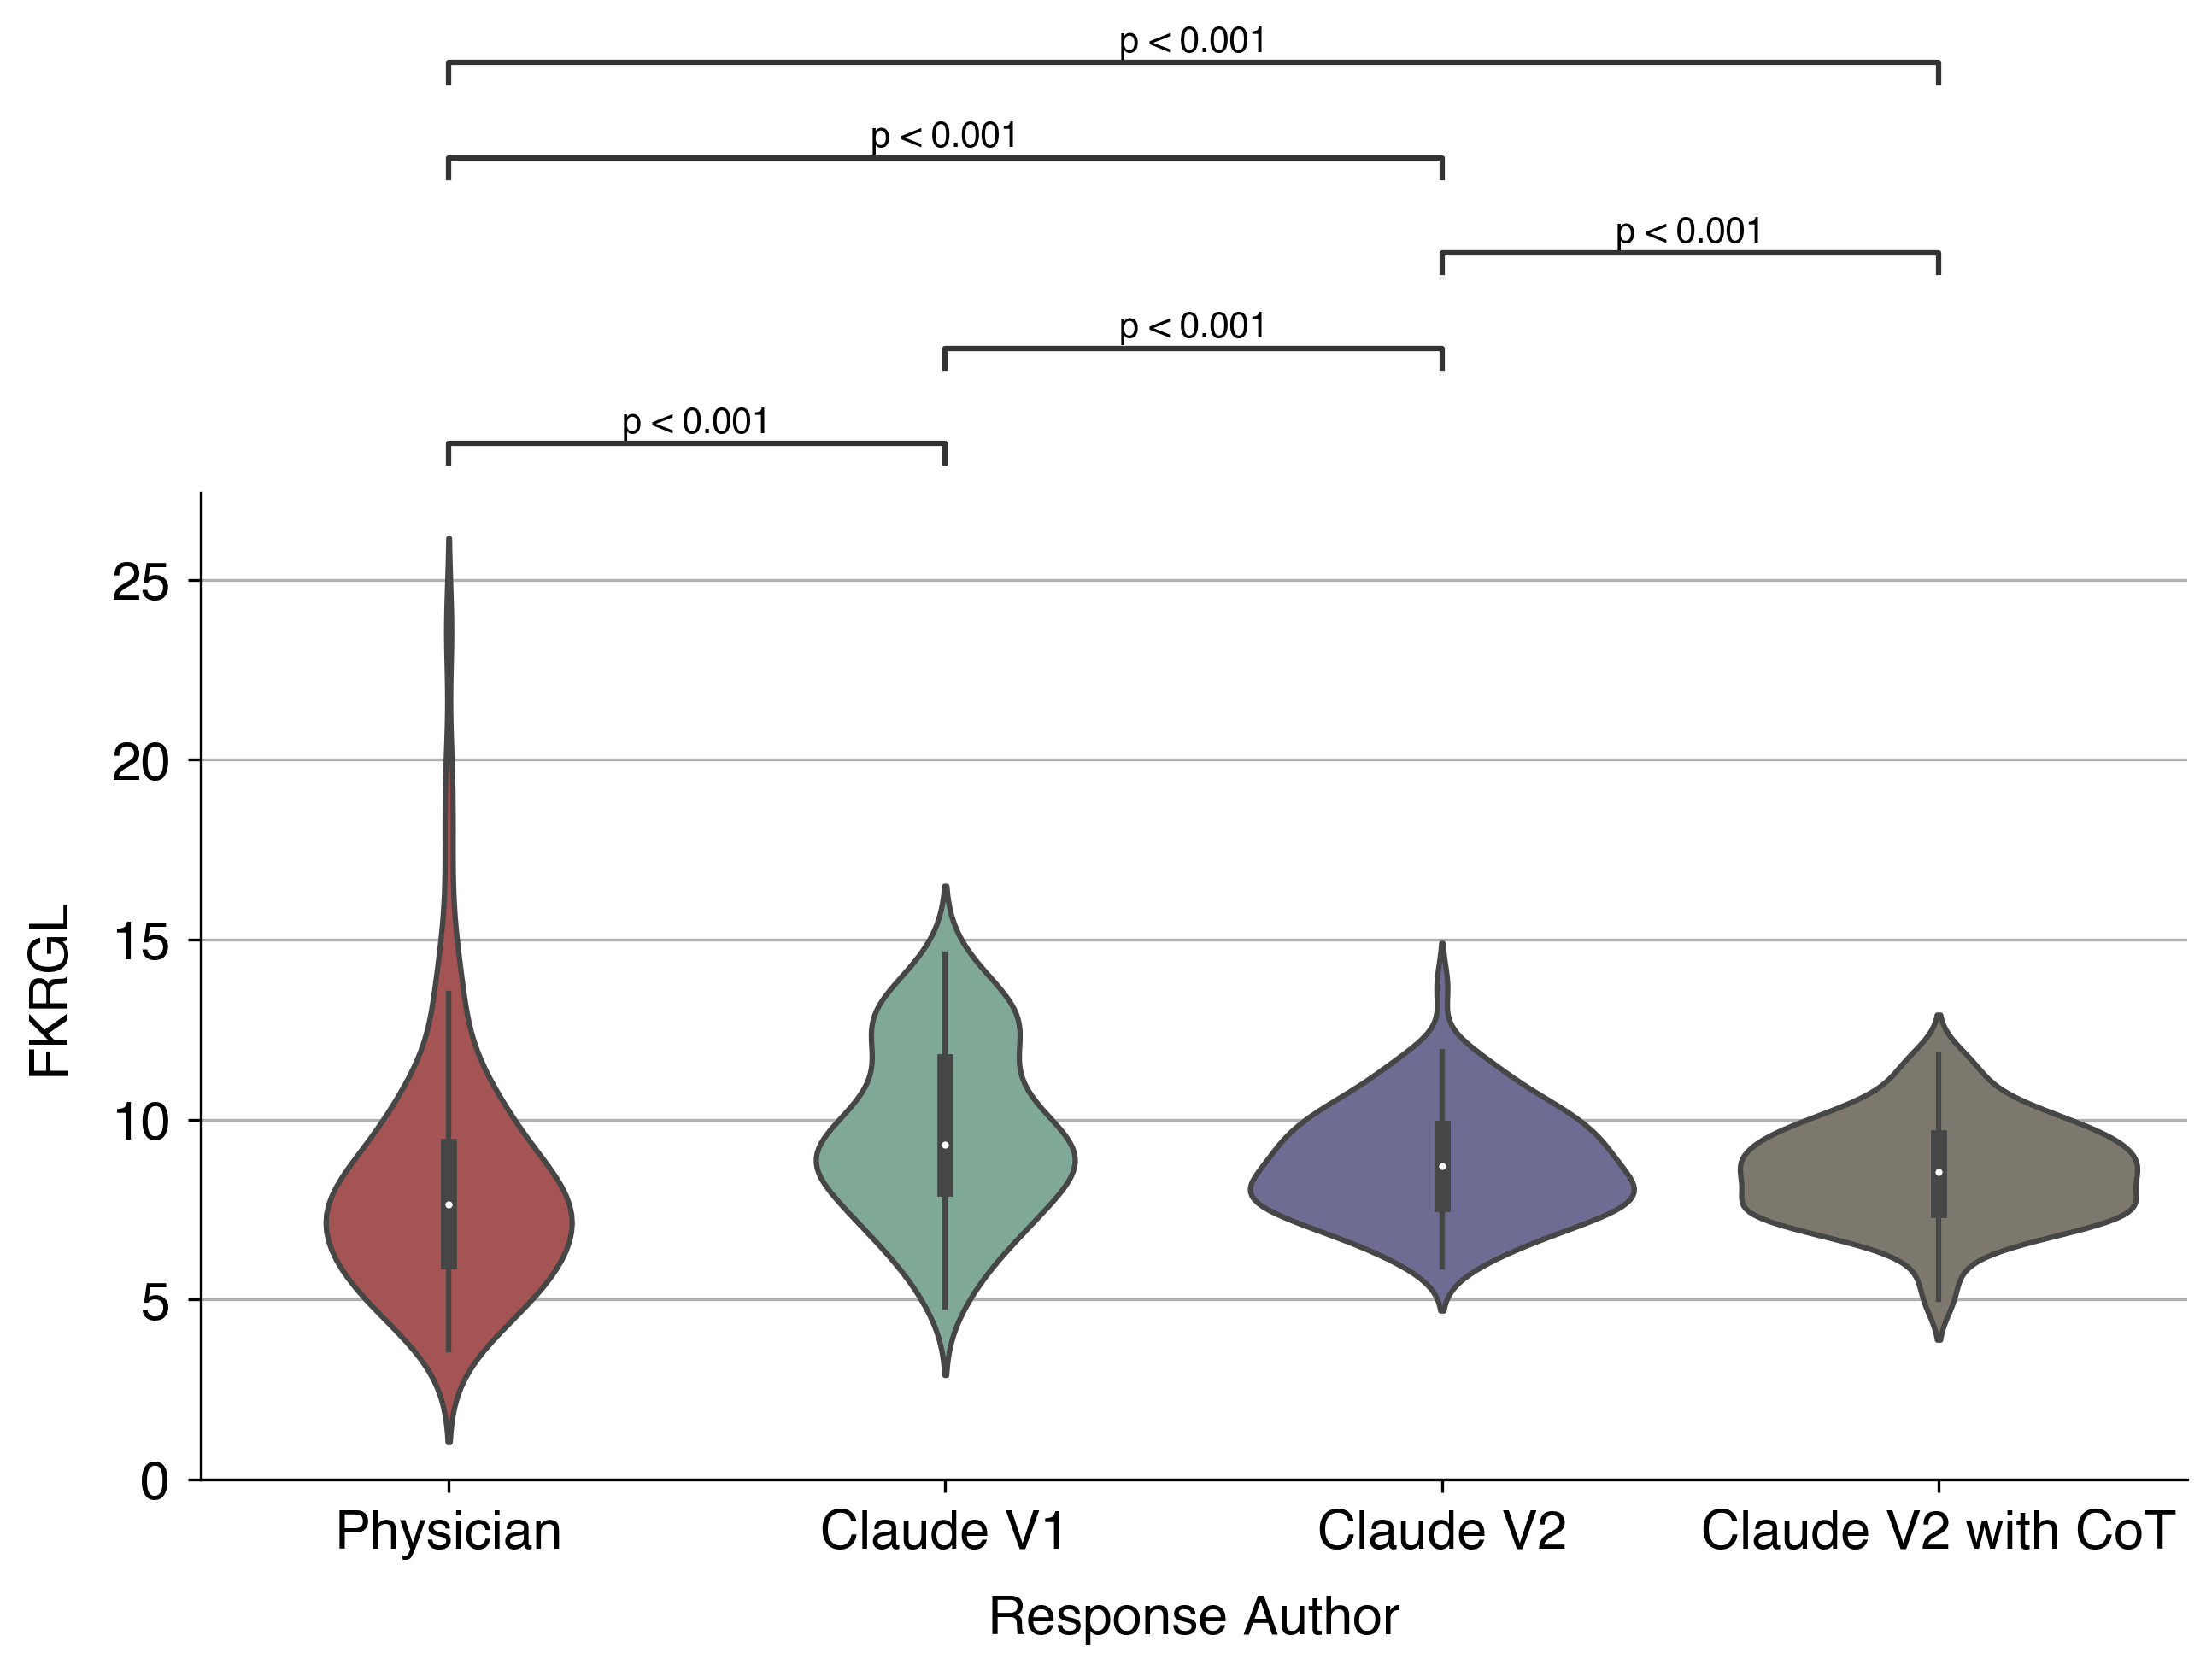

In [150]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.violinplot(data=readability_df_melt,
               x='variable',
               y='value',
              ax=ax,
              palette={"Physician": "#B24745",
                        "Claude V1": "#79AF97",
                      "Claude V2": "#6A6599",
                      "Claude V2 with CoT": "#80796B"})
ax.tick_params(axis ='both', which ='major',  
               labelsize = 15, pad = 5,  
               colors ='black') 
ax.set_xlabel('Response Author', size=15, labelpad=10)
ax.set_ylabel('FKRGL', size=15, labelpad=10)
ax.spines[['right', 'top']].set_visible(False)
ax.set_ylim(0,)
pairs = list(itertools.combinations(['Physician', 'Claude V1', 'Claude V2', 'Claude V2 with CoT'], 2))

annotator = Annotator(ax, pairs, data=word_count_df, x='variable', y='value', 
                      order=['Physician', 'Claude V1', 'Claude V2', 'Claude V2 with CoT'])
annotator.configure(test='Wilcoxon', text_format='star', loc='outside', comparisons_correction="BH", hide_non_significant=True,
    pvalue_thresholds=[[1e-3, "p < 0.001"], [1e-2, "**"], [0.05, "*"]])
annotator.apply_and_annotate()

ax.set_axisbelow(True)
ax.grid(axis='y', zorder=0) 

plt.show()

fig.savefig('SupFigure5 FKRGL.svg', format='svg', dpi=300, bbox_inches='tight')

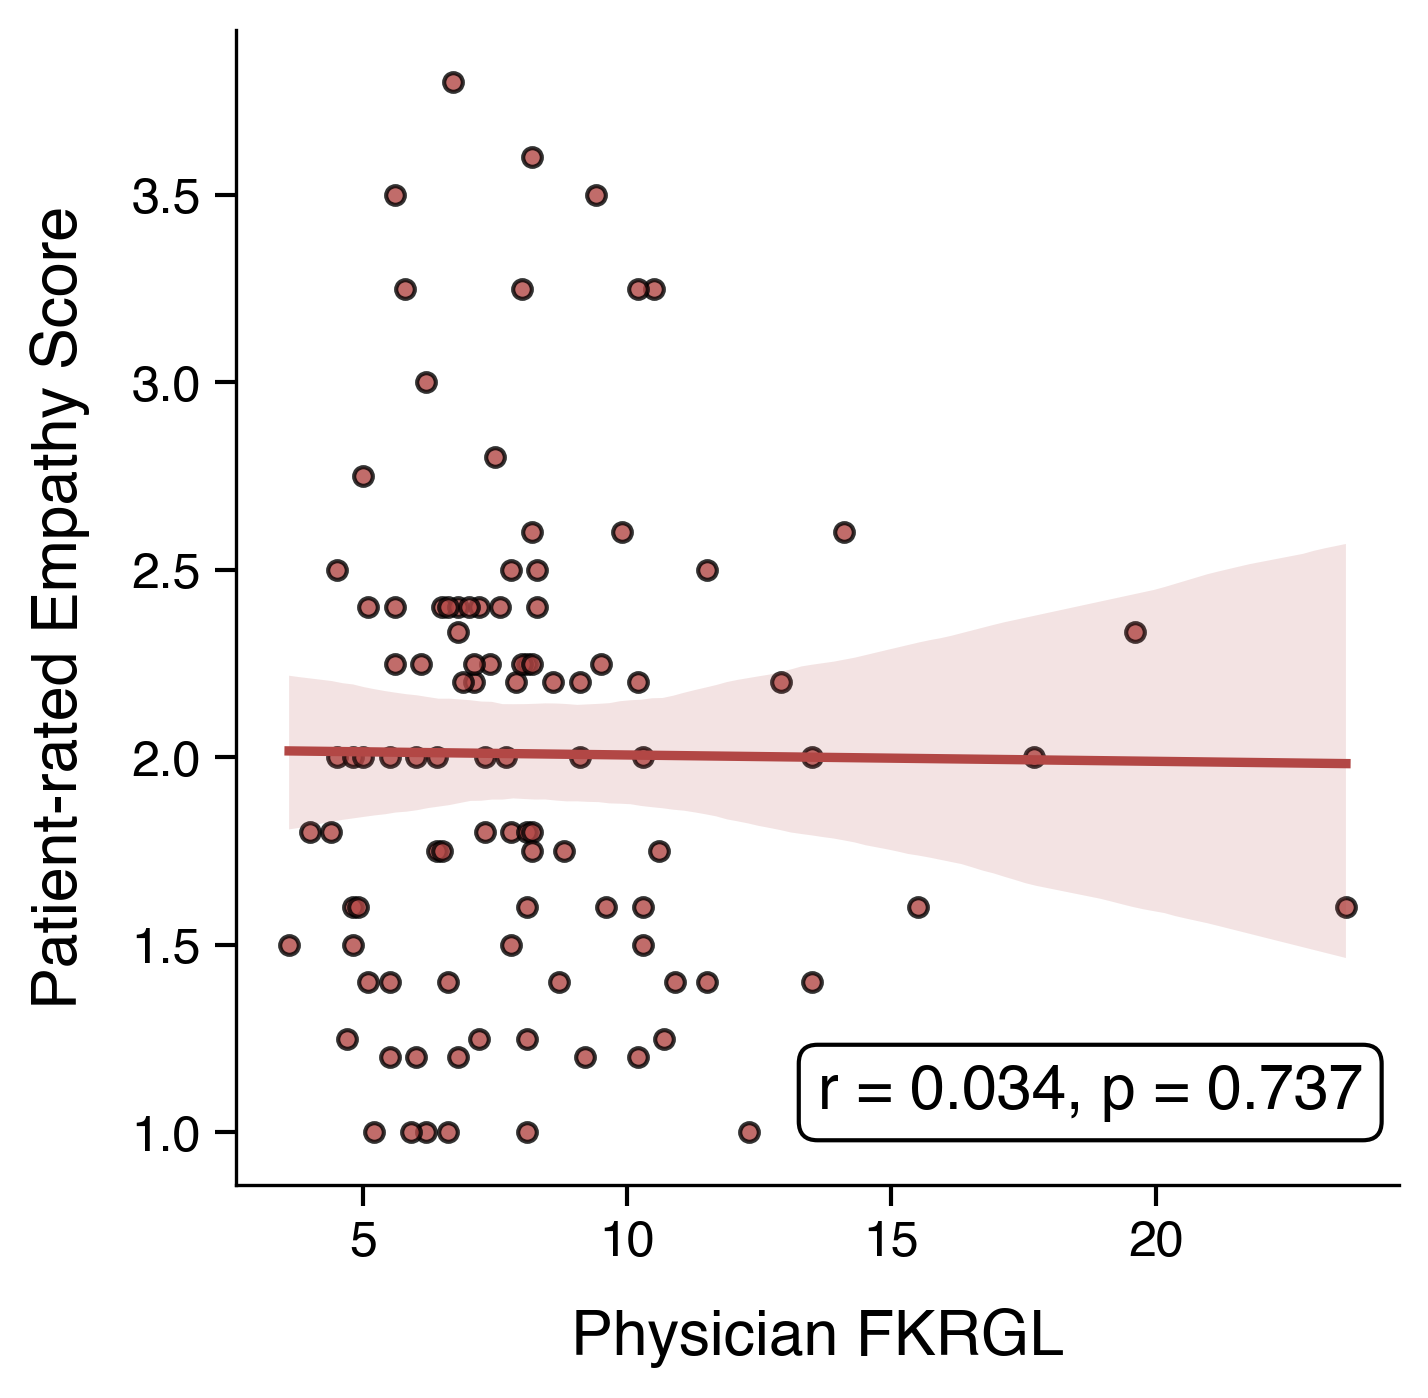

In [152]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

x = readability_df['Physician'].astype(float)
y = patient_data['Physician'].astype(float)
sns.regplot(x = x,
                    y = y,
                   color=palette['Physician'],
                marker="o",
               scatter_kws={'s':20, 'edgecolor':'black', 'linewidths':1})

r, p = stats.spearmanr(x,
                         y)

ax.annotate(f'r = {r:.3f}, p = {p:.3f}',
                        xy=(0.5, 0.08), xycoords='axes fraction',
                        ha='left', va='center', size=15,
                        bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'black', 'linewidth':1})

ax.set_xlabel('Physician FKRGL', size=15, labelpad=10)
ax.set_ylabel('Patient-rated Empathy Score', size=15, labelpad=10)
ax.spines[['right', 'top']].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=12, width=1, length=5)

plt.show()
fig.savefig('SupFigure3A Corr Physician Readability vs. Patient Empathy.svg', format='svg', dpi=300)

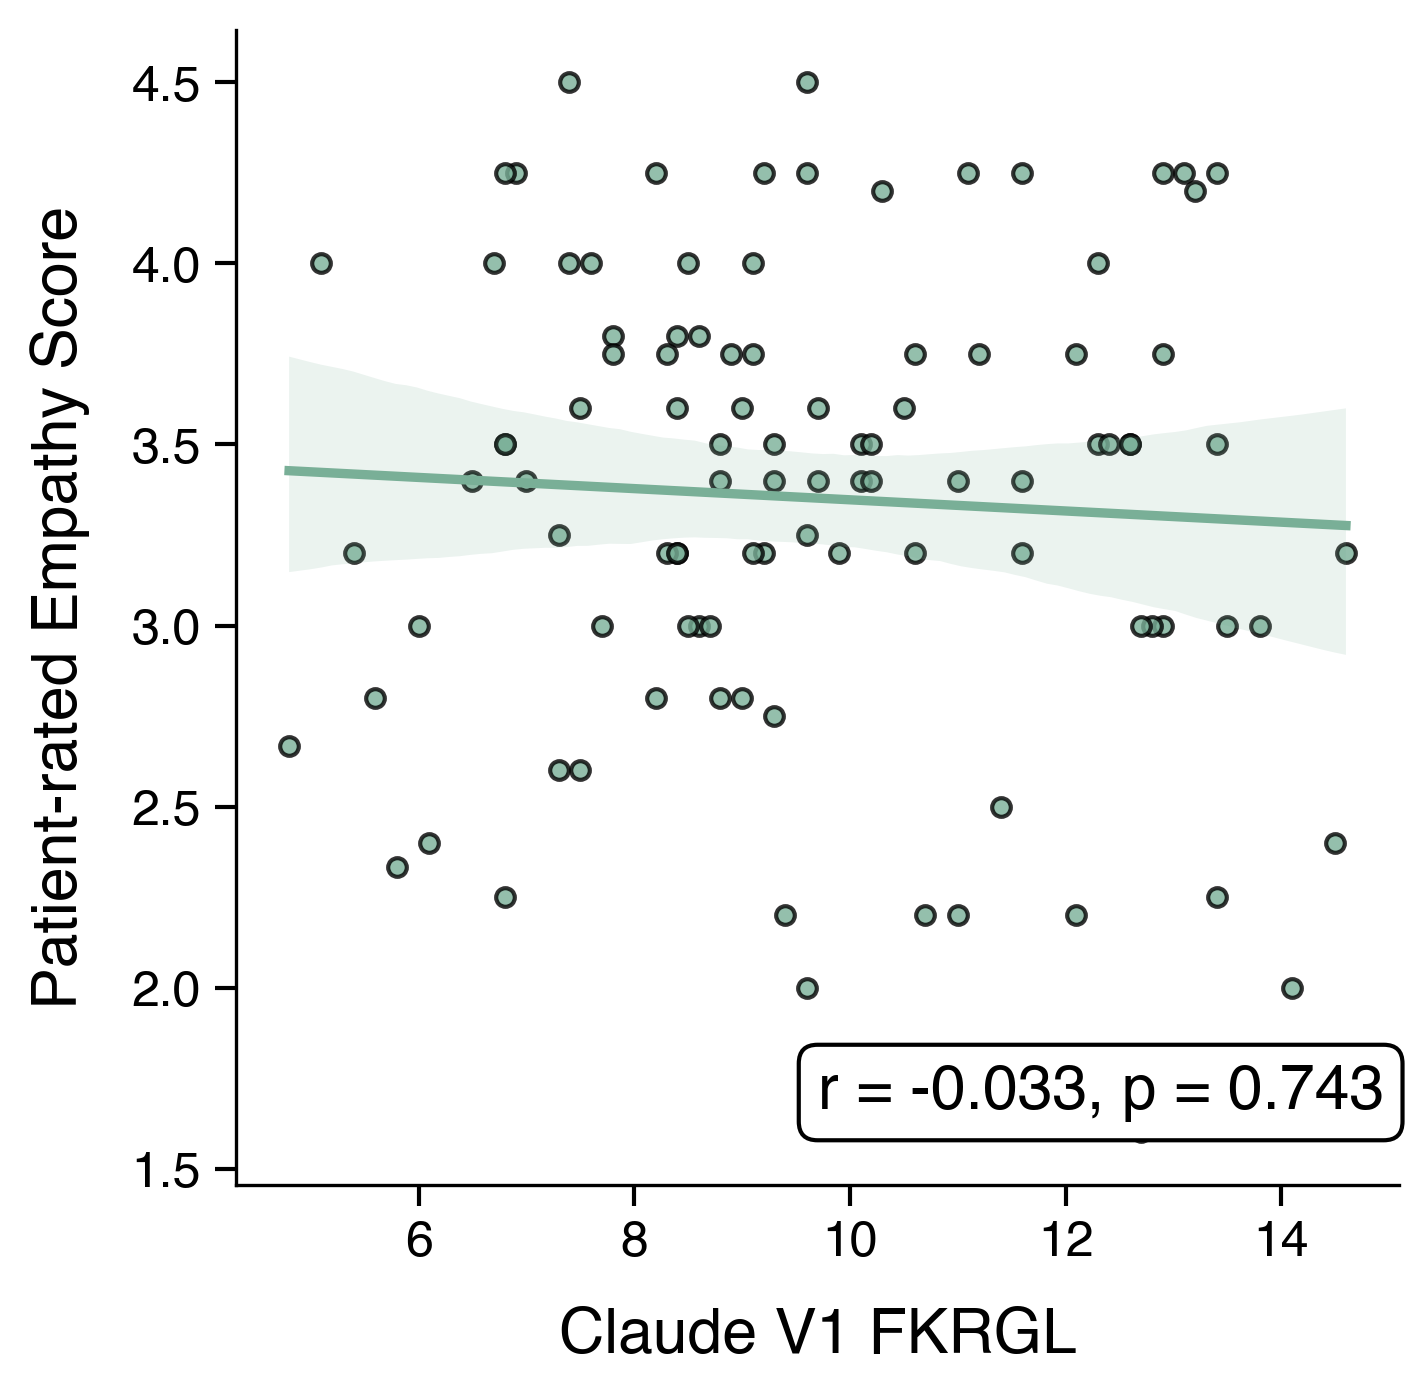

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

x = readability_df['Claude V1'].astype(float)
y = patient_data['Claude V1'].astype(float)
sns.regplot(x = x,
                    y = y,
                   color=palette['Claude V1'],
                marker="o",
               scatter_kws={'s':20, 'edgecolor':'black', 'linewidths':1})

r, p = stats.spearmanr(x,
                         y)

ax.annotate(f'r = {r:.3f}, p = {p:.3f}',
                        xy=(0.5, 0.08), xycoords='axes fraction',
                        ha='left', va='center', size=15,
                        bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'black', 'linewidth':1})

ax.set_xlabel('Claude V1 FKRGL', size=15, labelpad=10)
ax.set_ylabel('Patient-rated Empathy Score', size=15, labelpad=10)
ax.spines[['right', 'top']].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=12, width=1, length=5)

plt.show()
fig.savefig('SupFigure3B Corr ClaudeV1 Readability vs. Patient Empathy.svg', format='svg', dpi=300)

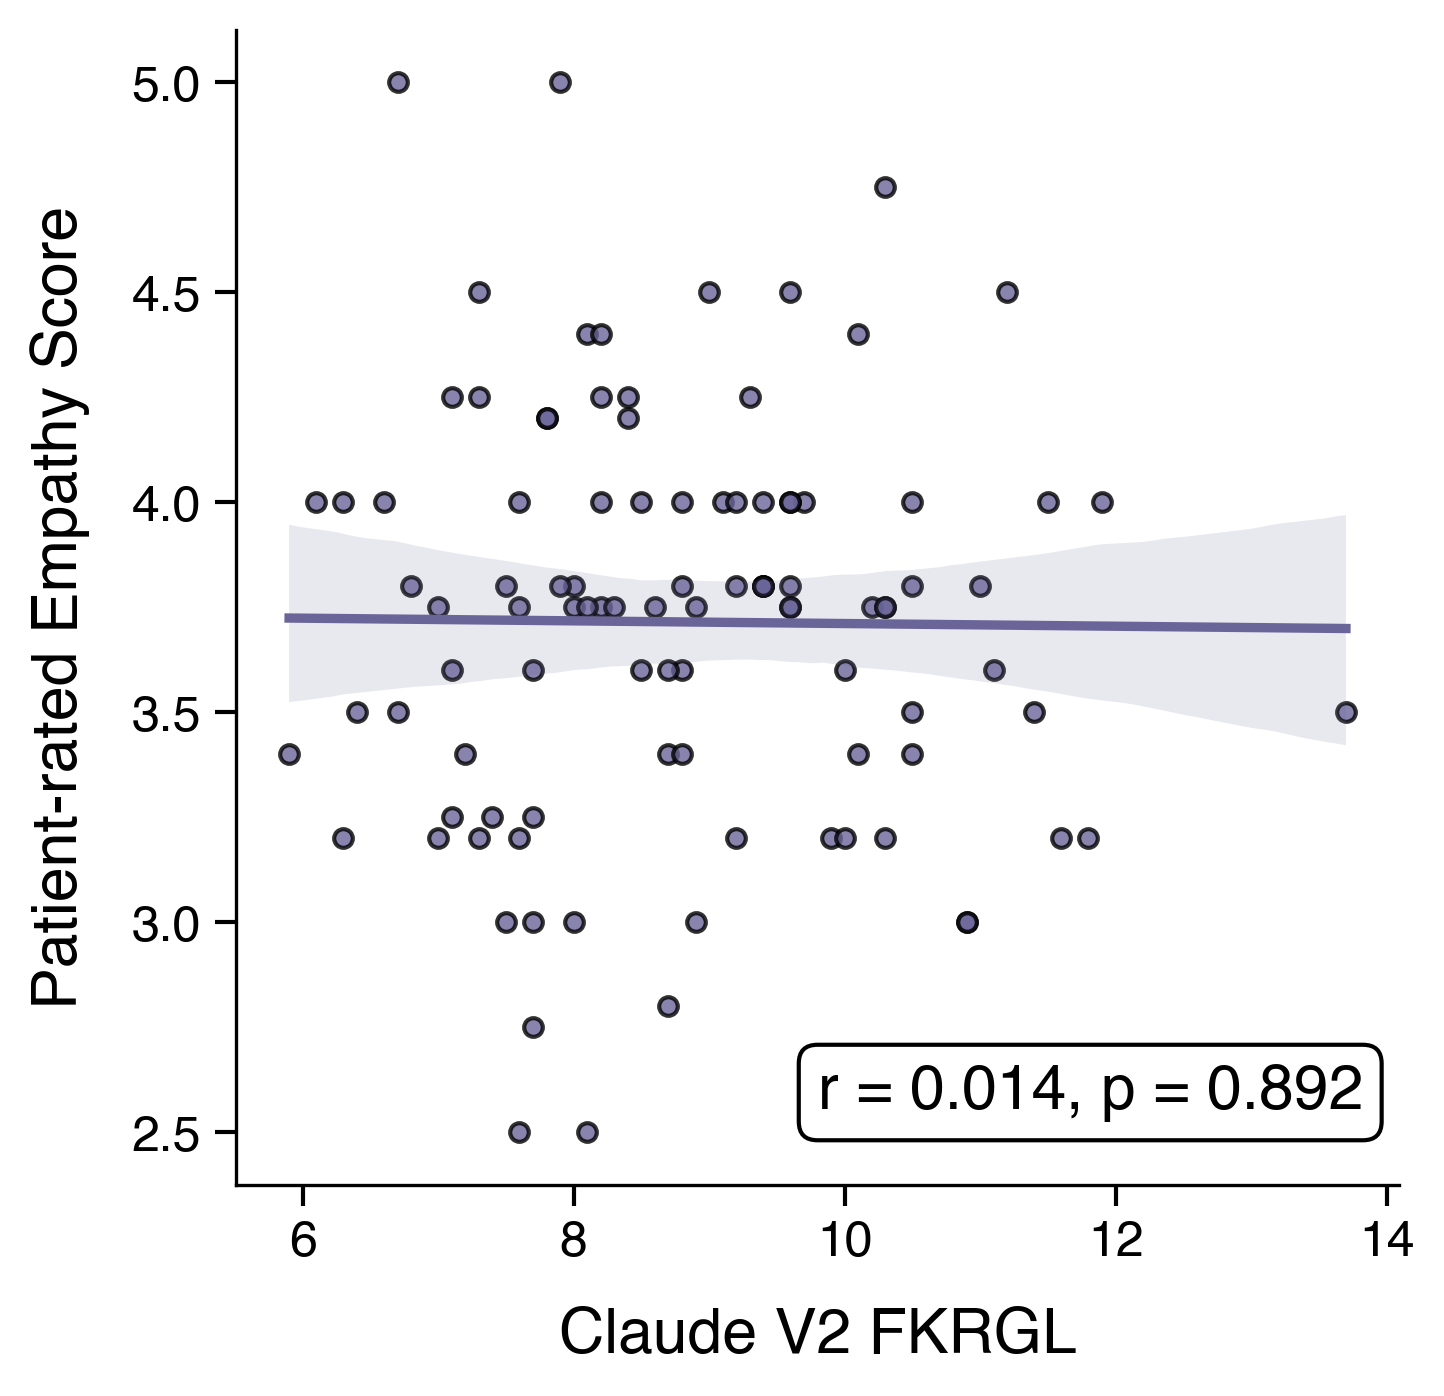

In [156]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

x = readability_df['Claude V2'].astype(float)
y = patient_data['Claude V2'].astype(float)
sns.regplot(x = x,
                    y = y,
                   color=palette['Claude V2'],
                marker="o",
               scatter_kws={'s':20, 'edgecolor':'black', 'linewidths':1})

r, p = stats.spearmanr(x,
                         y)

ax.annotate(f'r = {r:.3f}, p = {p:.3f}',
                        xy=(0.5, 0.08), xycoords='axes fraction',
                        ha='left', va='center', size=15,
                        bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'black', 'linewidth':1})

ax.set_xlabel('Claude V2 FKRGL', size=15, labelpad=10)
ax.set_ylabel('Patient-rated Empathy Score', size=15, labelpad=10)
ax.spines[['right', 'top']].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=12, width=1, length=5)

plt.show()
fig.savefig('SupFigure3C Corr ClaudeV2 Readability vs. Patient Empathy.svg', format='svg', dpi=300)

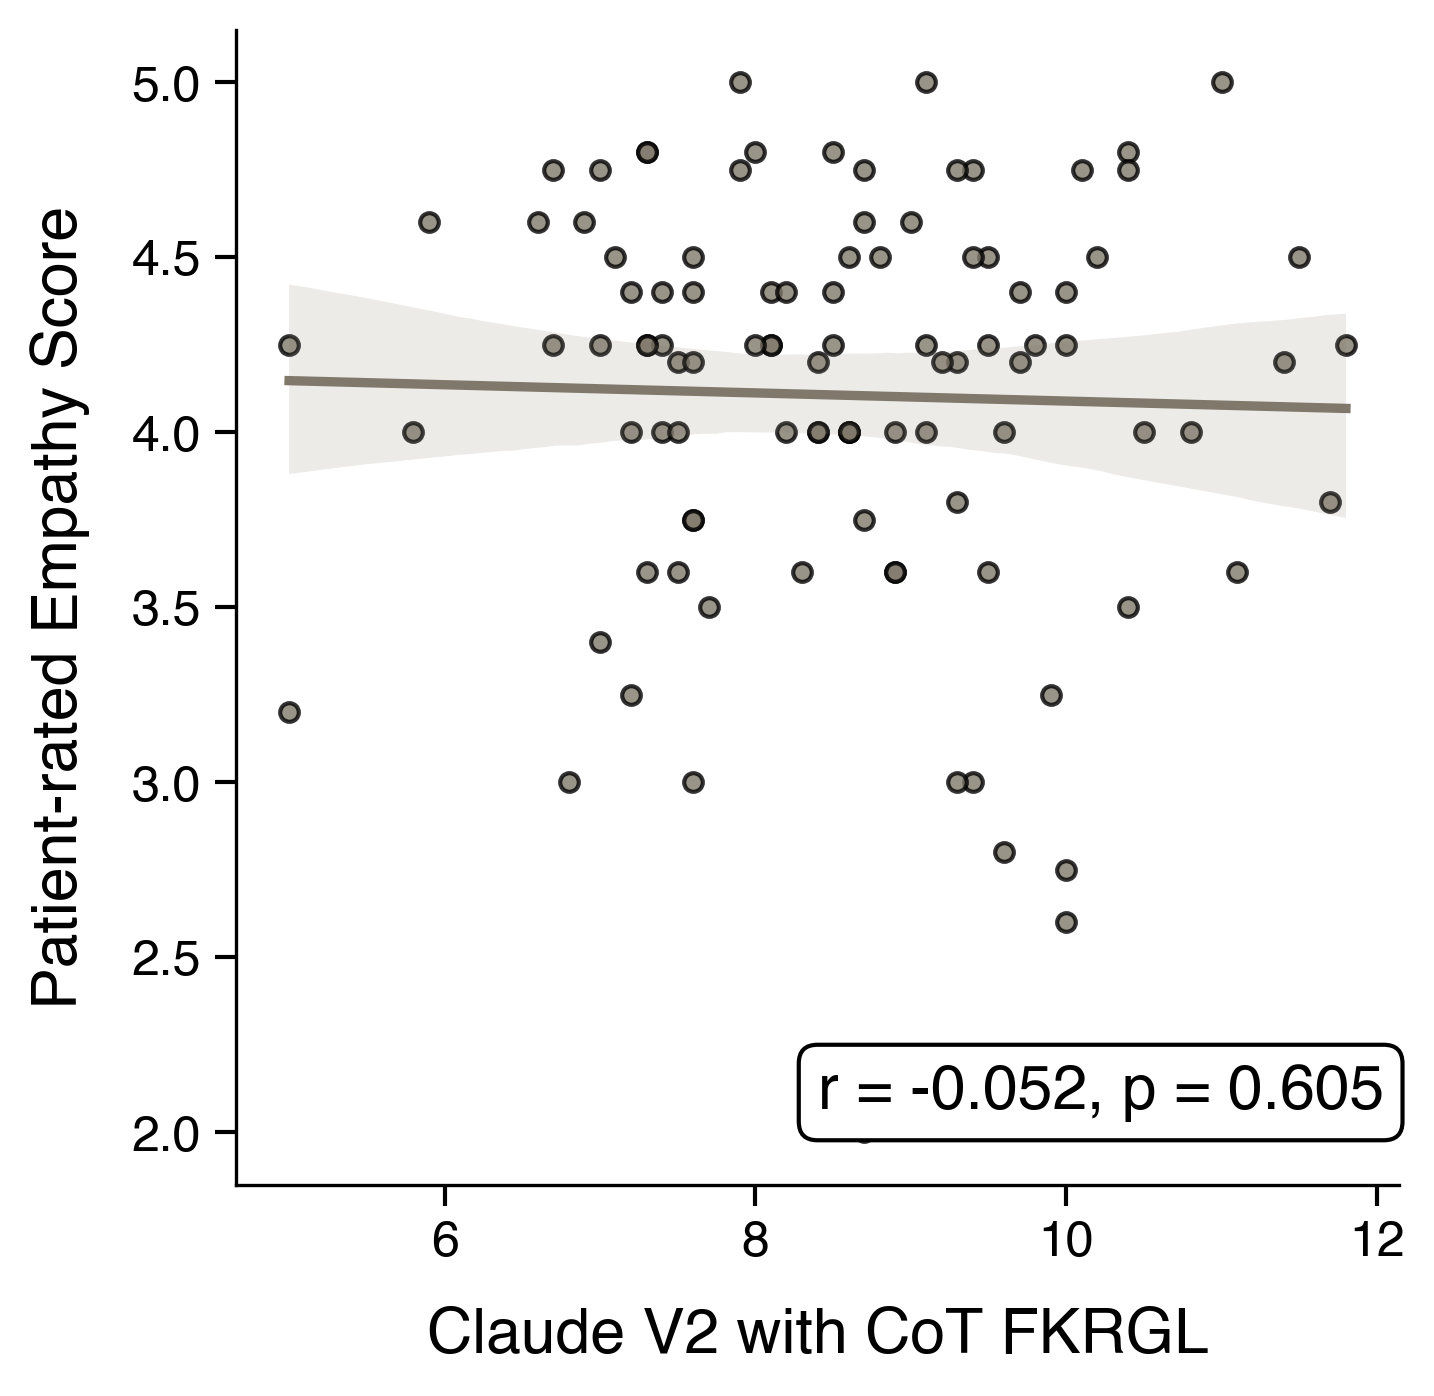

In [158]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

x = readability_df['Claude V2 with CoT'].astype(float)
y = patient_data['Claude V2 with CoT'].astype(float)
sns.regplot(x = x,
                    y = y,
                   color=palette['Claude V2 with CoT'],
                marker="o",
               scatter_kws={'s':20, 'edgecolor':'black', 'linewidths':1})

r, p = stats.spearmanr(x,
                         y)

ax.annotate(f'r = {r:.3f}, p = {p:.3f}',
                        xy=(0.5, 0.08), xycoords='axes fraction',
                        ha='left', va='center', size=15,
                        bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'black', 'linewidth':1})

ax.set_xlabel('Claude V2 with CoT FKRGL', size=15, labelpad=10)
ax.set_ylabel('Patient-rated Empathy Score', size=15, labelpad=10)
ax.spines[['right', 'top']].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=12, width=1, length=5)

plt.show()
fig.savefig('SupFigure3D Corr ClaudeV2CoT Readability vs. Patient Empathy.svg', format='svg', dpi=300)

# Cohen's D

In [250]:
from itertools import combinations

In [252]:
def cohens_d(list1, list2):
    # Convert lists to numpy arrays
    arr1 = np.array(list1)
    arr2 = np.array(list2)
    
    # Calculate means
    mean1 = np.mean(arr1)
    mean2 = np.mean(arr2)

    # Calculate pooled standard deviation
    n1, n2 = len(arr1), len(arr2)
    var1, var2 = np.var(arr1, ddof=1), np.var(arr2, ddof=1)
    pooled_std = np.sqrt(((n1 - 1)*var1 + (n2 - 1)*var2) / (n1 + n2 - 2))

    # Calculate Cohen's d
    d = (mean1 - mean2) / pooled_std

    return float(d)

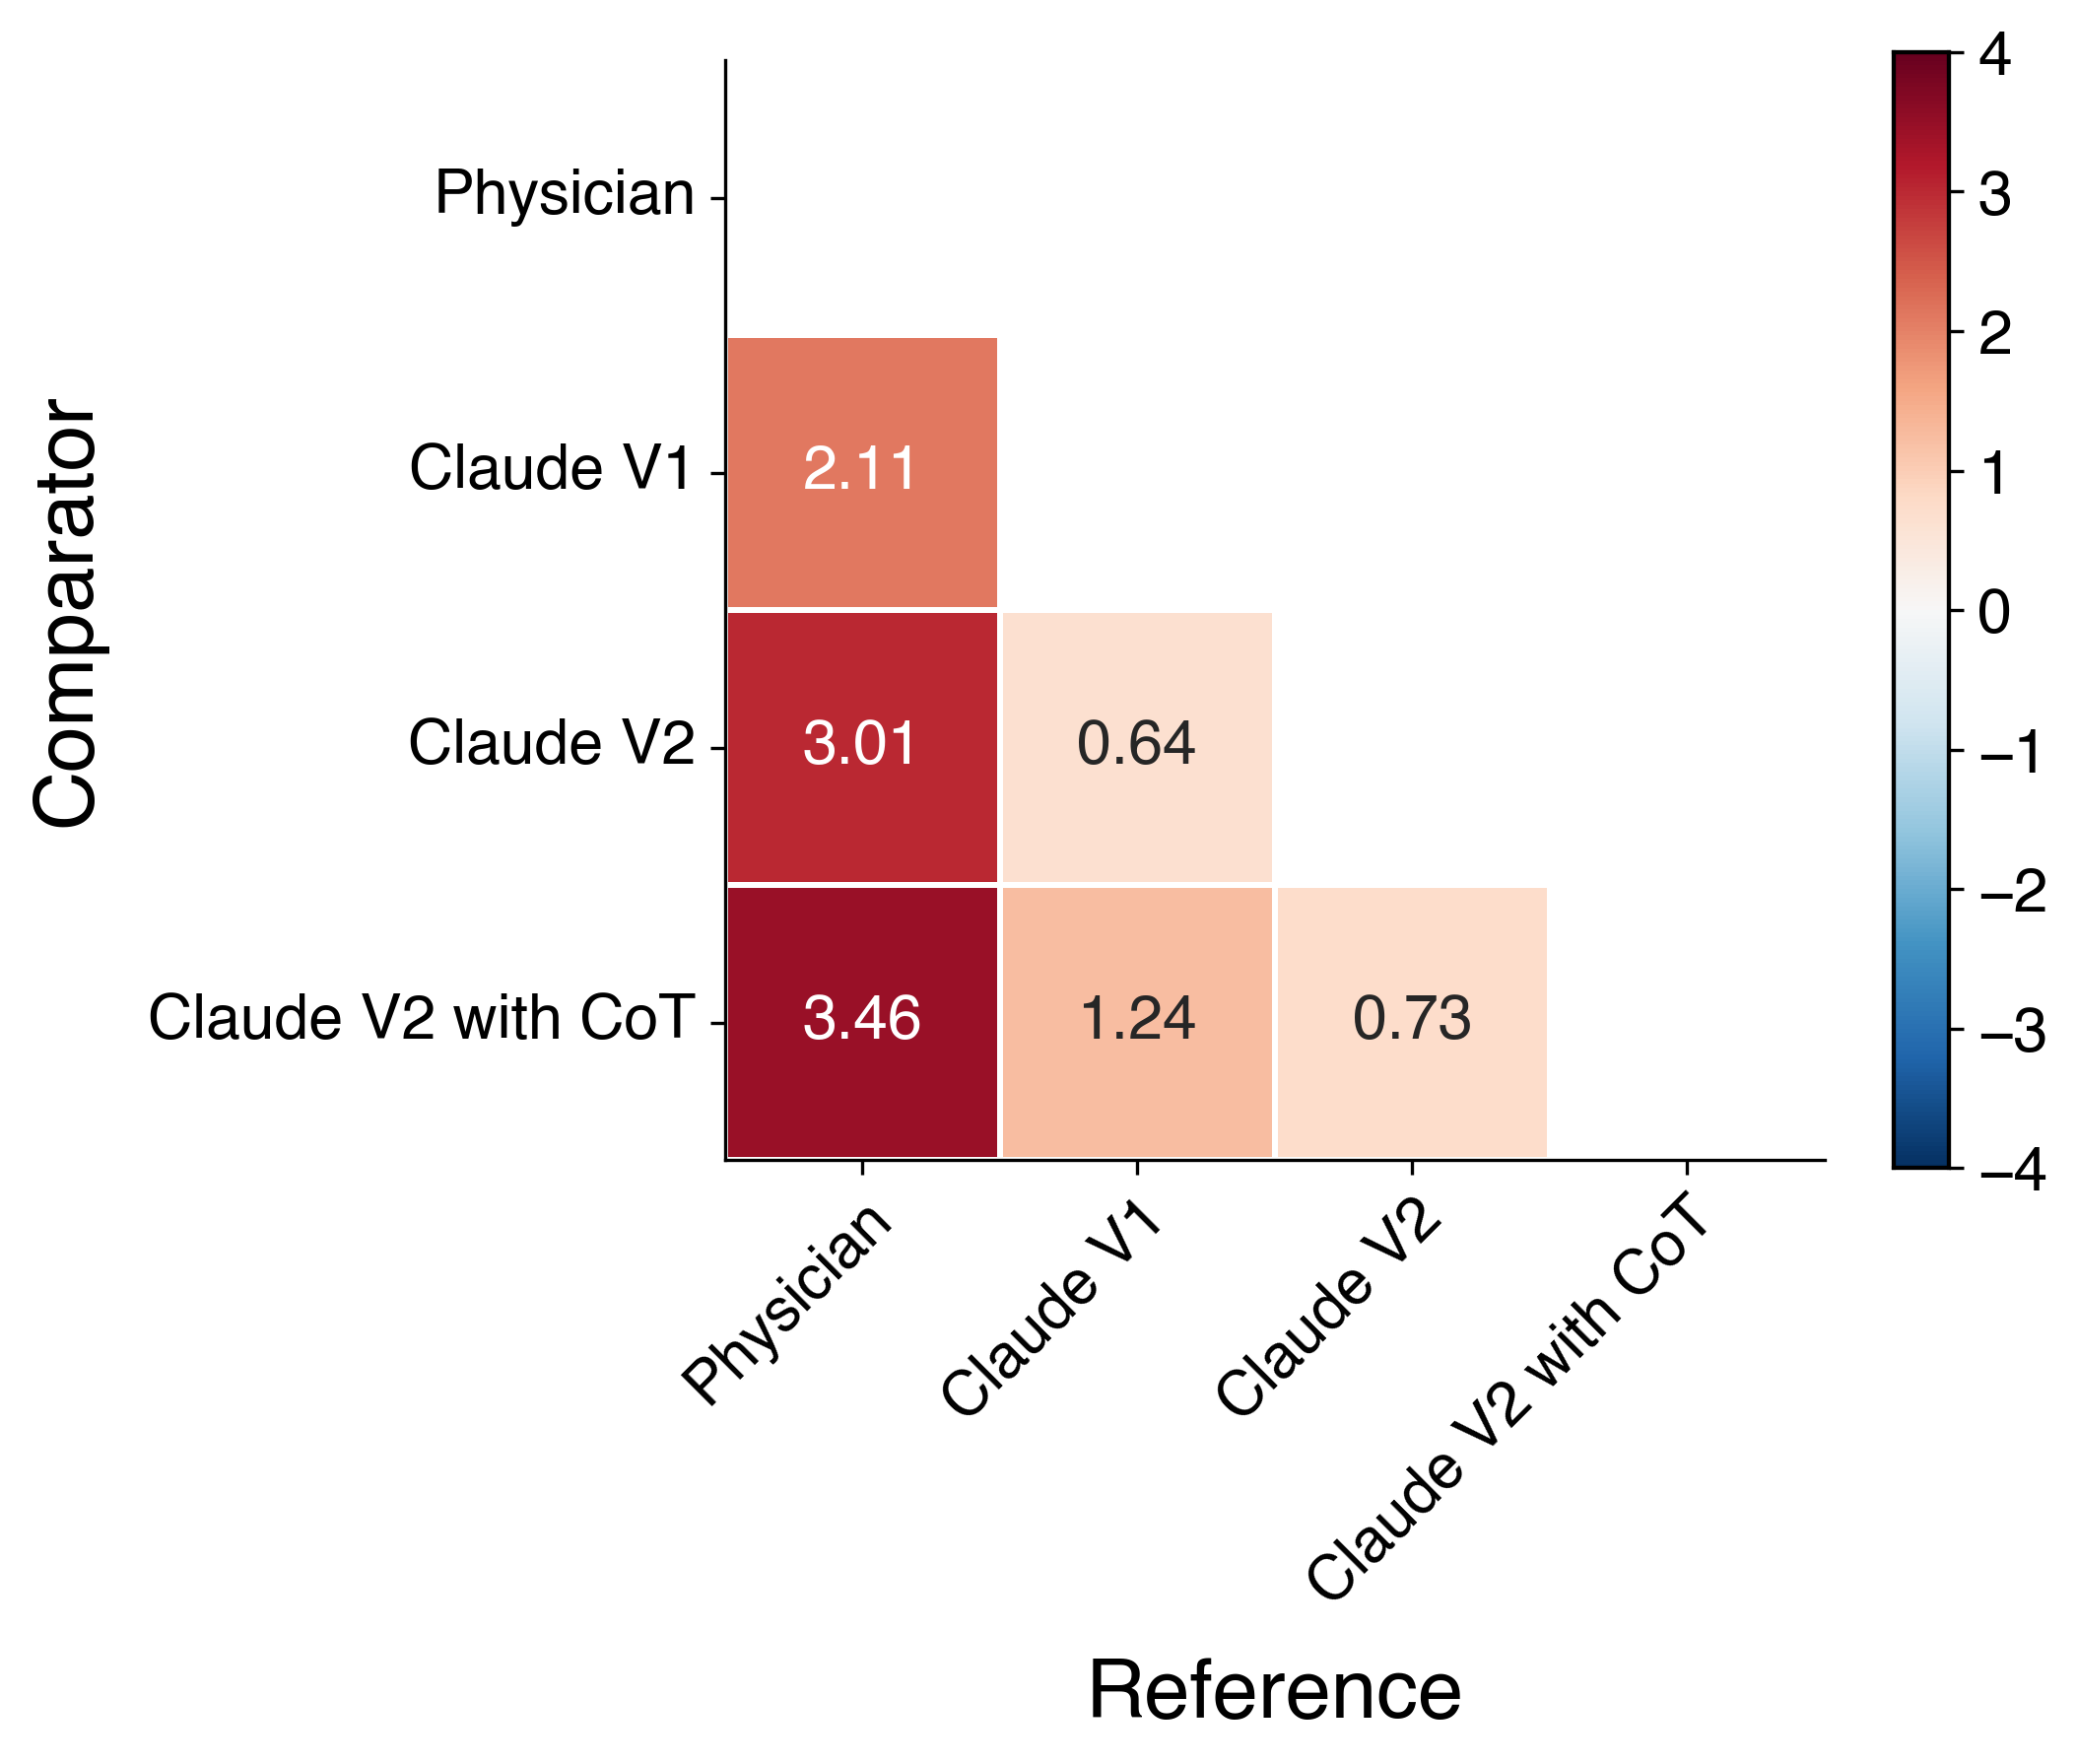

In [256]:
cohen_patient_data = pd.DataFrame(index = patient_data.columns,
                                  columns = patient_data.columns)

for x in cohen_patient_data.index:
    for y in cohen_patient_data.columns:
        cohen_patient_data.loc[x,y] = cohens_d(patient_data[x], patient_data[y])

cohen_patient_data = cohen_patient_data.astype(float)

mask_matrix = np.zeros_like(cohen_patient_data, dtype=bool)
mask_matrix[np.triu_indices_from(mask_matrix)] = True

fig, ax = plt.subplots(1, 1, figsize=(6,5))
sns.heatmap(data=cohen_patient_data, 
            annot=True,
           vmax=4,
           vmin=-4,
           cmap='RdBu_r',
           linewidth=1, 
            linecolor='white',
            ax=ax,
           square=True,
           annot_kws={"size":15},
           mask=mask_matrix,
           fmt='.2f')

cax = ax.figure.axes[-1]
cax.tick_params(labelsize=15)

for spine in cax.spines.values():
    spine.set(visible=True, lw=1, edgecolor="black")

for _, spine in ax.spines.items():
    spine.set_visible(True)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticklabels(cohen_patient_data.columns, rotation=45, ha='right', rotation_mode='anchor', size=15)
ax.set_yticklabels(cohen_patient_data.columns, rotation=0, ha='right', rotation_mode='anchor', size=15)
ax.set_xlabel('Reference', size=20, labelpad=10)
ax.set_ylabel('Comparator', size=20, labelpad=10)

plt.show()

fig.savefig('SupFigure1.svg', format='svg', dpi=300, bbox_inches='tight')

In [272]:
cohens_d(patient_data['Physician'], phys_data['Physician'])


-0.3610293860619533

In [274]:
cohens_d(patient_data['Claude V1'], phys_data['Claude V1'])


-0.2817238555866036

# Association of Demographic and Empathy

In [287]:
from firthlogist import FirthLogisticRegression, load_sex2

In [368]:
demographic

,Age,Income,Education,Race,Gender,Sex
0,40-64,Undisclosed,Baccalaureate,White,Female,Female
1,65+,>$100k,Graduate Degree,White,Male,Male
2,65+,>$100k,High School,White,Male,Male
3,65+,>$100k,Baccalaureate,White,Male,Male
4,65+,<$100k,Baccalaureate,White,Male,Male
5,40-64,>$100k,Baccalaureate,White,Male,Male
6,65+,<$100k,Baccalaureate,White,Male,Male
7,18-39,>$100k,Graduate Degree,South Asian,Male,Male
8,40-64,>$100k,Graduate Degree,Indigenous,Female,Female
9,65+,>$100k,Baccalaureate,White,Female,Female


In [370]:
survey_data

,Q1_Physician,Q1_Claude V1,Q1_Claude V2,Q1_Claude V2 Engineered,Q2_Physician,Q2_Claude V1,Q2_Claude V2,Q2_Claude V2 Engineered,Q3_Physician,Q3_Claude V1,...,Q8_Claude V2,Q8_Claude V2 Engineered,Q9_Physician,Q9_Claude V1,Q9_Claude V2,Q9_Claude V2 Engineered,Q10_Physician,Q10_Claude V1,Q10_Claude V2,Q10_Claude V2 Engineered
0,2,4.0,4,5.0,2,3.0,4.0,5.0,1.0,2.0,...,4.0,5.0,1.0,2.0,4.0,5.0,1.0,3.0,3.0,5.0
1,2,3.0,4,5.0,2,3.0,3.0,4.0,3.0,2.0,...,4.0,5.0,1.0,2.0,3.0,4.0,2.0,2.0,3.0,4.0
2,2,3.0,4,5.0,2,2.0,4.0,3.0,2.0,3.0,...,5.0,3.0,NaN,NaN,NaN,NaN,4.0,NaN,1.0,4.0
3,3,4.0,5,5.0,3,5.0,5.0,5.0,1.0,2.0,...,5.0,5.0,1.0,2.0,4.0,5.0,3.0,3.0,3.0,4.0
4,3,4.0,5,5.0,4,5.0,4.0,5.0,2.0,2.0,...,4.0,5.0,1.0,2.0,4.0,5.0,3.0,3.0,4.0,5.0
5,2,4.0,4,4.0,2,2.0,3.0,4.0,2.0,3.0,...,4.0,5.0,1.0,3.0,4.0,5.0,1.0,2.0,3.0,4.0
6,3,3.0,4,5.0,4,1.0,1.0,5.0,2.0,4.0,...,5.0,5.0,2.0,2.0,4.0,5.0,1.0,1.0,3.0,3.0
7,2,4.0,5,5.0,2,3.0,4.0,4.0,2.0,3.0,...,3.0,4.0,2.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0
8,1,3.0,5,4.0,1,2.0,4.0,3.0,1.0,3.0,...,4.0,3.0,3.0,5.0,4.0,4.0,1.0,NaN,4.0,5.0
9,2,2.0,3,3.0,3,3.0,4.0,3.0,4.0,3.0,...,3.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0,4.0,2.0


# Degree

In [489]:
highschool = demographic[demographic['Education'] == 'High School'].index
postsecondary = demographic[demographic['Education'].isin(['Baccalaureate', 'Graduate Degree'])].index

physician_df = survey_data[[x for x in survey_data.columns if 'Physician' in x]]
claudev1_df = survey_data[[x for x in survey_data.columns if 'Claude V1' in x]]
claudev2_df = survey_data[[x for x in survey_data.columns if 'Claude V2' in x]]
claudev2cot_df = survey_data[[x for x in survey_data.columns if 'Claude V2 Engineered' in x]]

In [491]:
lr_df = pd.DataFrame()
lr_df['Physician'] = physician_df.loc[list(highschool) + list(postsecondary)].mean(axis=1)
lr_df['Claude V1'] = claudev1_df.loc[list(highschool) + list(postsecondary)].mean(axis=1)
lr_df['Claude V2'] = claudev2_df.loc[list(highschool) + list(postsecondary)].mean(axis=1)
lr_df['Claude V2 with CoT'] = claudev2cot_df.loc[list(highschool) + list(postsecondary)].mean(axis=1)


In [493]:
fl = FirthLogisticRegression()
fl.fit(lr_df, 
       list(np.repeat(0, len(highschool))) + list(np.repeat(1, len(postsecondary))))

fl.summary(xname=['Physician', 'Claude V1', 'Claude V2', 'Claude V2 with CoT'])

                         coef    std err     [0.025    0.975]    p-value
------------------  ---------  ---------  ---------  --------  ---------
Physician            0.313581   0.712777  -0.975155  1.78658    0.618587
Claude V1           -0.234138   0.623131  -1.45386   0.989674   0.66612
Claude V2           -1.32106    2.06741   -5.51923   2.50665    0.475737
Claude V2 with CoT   1.50556    1.51333   -1.35307   4.50108    0.288315
Intercept            0.768122   3.62922   -6.20194   8.23522    0.795866

Log-Likelihood: -14.6943
Newton-Raphson iterations: 8



In [499]:
print(len(highschool))
print(len(postsecondary))

6
35


In [495]:
# Retrieve model attributes
coef = fl.coef_
intercept = fl.intercept_
bse = fl.bse_
ci = fl.ci_
pvals = fl.pvals_

# Feature names
feature_names = lr_df.columns  # Replace with your actual feature names

# Create DataFrame
results_df = pd.DataFrame({
    'Response Author': list(feature_names) + ['Intercept'],
    'Coefficient': list(coef) + [intercept],
    'Standard Error': list(bse),
    'CI Lower (95%)': list(ci[:, 0]),
    'CI Upper (95%)': list(ci[:, 1]),
    'P-value': list(pvals)
})

results_df

,Response Author,Coefficient,Standard Error,CI Lower (95%),CI Upper (95%),P-value
0,Physician,0.313581,0.712777,-0.975155,1.786575,0.618587
1,Claude V1,-0.234138,0.623131,-1.453862,0.989674,0.666120
2,Claude V2,-1.321058,2.067414,-5.519233,2.506651,0.475737
3,Claude V2 with CoT,1.505560,1.513333,-1.353070,4.501077,0.288315
4,Intercept,0.768122,3.629220,-6.201943,8.235223,0.795866


## Age

In [449]:
age_over65 = demographic[demographic['Age'] == '65+'].index
age_under65 = demographic[demographic['Age'].isin(['18-39', '40-64'])].index

physician_df = survey_data[[x for x in survey_data.columns if 'Physician' in x]]
claudev1_df = survey_data[[x for x in survey_data.columns if 'Claude V1' in x]]
claudev2_df = survey_data[[x for x in survey_data.columns if 'Claude V2' in x]]
claudev2cot_df = survey_data[[x for x in survey_data.columns if 'Claude V2 Engineered' in x]]

In [451]:
lr_df = pd.DataFrame()
lr_df['Physician'] = physician_df.loc[list(age_under65) + list(age_over65)].mean(axis=1)
lr_df['Claude V1'] = claudev1_df.loc[list(age_under65) + list(age_over65)].mean(axis=1)
lr_df['Claude V2'] = claudev2_df.loc[list(age_under65) + list(age_over65)].mean(axis=1)
lr_df['Claude V2 with CoT'] = claudev2cot_df.loc[list(age_under65) + list(age_over65)].mean(axis=1)


In [453]:
fl = FirthLogisticRegression()
fl.fit(lr_df, 
       list(np.repeat(0, len(age_under65))) + list(np.repeat(1, len(age_over65))))

fl.summary(xname=['Physician', 'Claude V1', 'Claude V2', 'Claude V2 with CoT'])

                         coef    std err      [0.025     0.975]    p-value
------------------  ---------  ---------  ----------  ---------  ---------
Physician            1.68917    0.826197    0.27425    3.64214   0.0168773
Claude V1            0.604317   0.607166   -0.541191   1.85254   0.299709
Claude V2           -4.80193    2.32792   -10.1723    -0.854507  0.0149505
Claude V2 with CoT   3.41971    1.74917     0.484919   7.58861   0.0202581
Intercept            0.552503   3.58969    -6.22148    8.33695   0.866522

Log-Likelihood: -18.1145
Newton-Raphson iterations: 6



In [455]:
print(len(age_over65))
print(len(age_under65))

32
12


In [457]:
# Retrieve model attributes
coef = fl.coef_
intercept = fl.intercept_
bse = fl.bse_
ci = fl.ci_
pvals = fl.pvals_

# Feature names
feature_names = lr_df.columns  # Replace with your actual feature names

# Create DataFrame
results_df = pd.DataFrame({
    'Response Author': list(feature_names) + ['Intercept'],
    'Coefficient': list(coef) + [intercept],
    'Standard Error': list(bse),
    'CI Lower (95%)': list(ci[:, 0]),
    'CI Upper (95%)': list(ci[:, 1]),
    'P-value': list(pvals)
})

results_df

,Response Author,Coefficient,Standard Error,CI Lower (95%),CI Upper (95%),P-value
0,Physician,1.689169,0.826197,0.274250,3.642137,0.016877
1,Claude V1,0.604317,0.607166,-0.541191,1.852544,0.299709
2,Claude V2,-4.801932,2.327916,-10.172272,-0.854507,0.014951
3,Claude V2 with CoT,3.419708,1.749168,0.484919,7.588606,0.020258
4,Intercept,0.552503,3.589686,-6.221482,8.336948,0.866522


## Income

In [459]:
income_over100 = demographic[demographic['Income'] == '>$100k'].index
income_under100 = demographic[demographic['Income'] == '<$100k'].index

physician_df = survey_data[[x for x in survey_data.columns if 'Physician' in x]]
claudev1_df = survey_data[[x for x in survey_data.columns if 'Claude V1' in x]]
claudev2_df = survey_data[[x for x in survey_data.columns if 'Claude V2' in x]]
claudev2cot_df = survey_data[[x for x in survey_data.columns if 'Claude V2 Engineered' in x]]

In [461]:
lr_df = pd.DataFrame()
lr_df['Physician'] = physician_df.loc[list(income_under100) + list(income_over100)].mean(axis=1)
lr_df['Claude V1'] = claudev1_df.loc[list(income_under100) + list(income_over100)].mean(axis=1)
lr_df['Claude V2'] = claudev2_df.loc[list(income_under100) + list(income_over100)].mean(axis=1)
lr_df['Claude V2 with CoT'] = claudev2cot_df.loc[list(income_under100) + list(income_over100)].mean(axis=1)


In [463]:
fl = FirthLogisticRegression()
fl.fit(lr_df, 
       list(np.repeat(0, len(income_under100))) + list(np.repeat(1, len(income_over100))))

fl.summary(xname=['Physician', 'Claude V1', 'Claude V2', 'Claude V2 with CoT'])

                         coef    std err     [0.025     0.975]    p-value
------------------  ---------  ---------  ---------  ---------  ---------
Physician            0.261041   0.665193  -0.949166   1.6579     0.663972
Claude V1           -0.363872   0.574365  -1.53389    0.709966   0.500887
Claude V2           -0.74609    2.02346   -4.65471    3.11891    0.68992
Claude V2 with CoT   0.056984   1.45851   -2.91186    2.71901    0.899908
Intercept            4.30889    3.57748   -1.98399   12.286      0.186859

Log-Likelihood: -19.3026
Newton-Raphson iterations: 7



In [465]:
print(len(income_over100))
print(len(income_under100))

29
10


In [467]:
# Retrieve model attributes
coef = fl.coef_
intercept = fl.intercept_
bse = fl.bse_
ci = fl.ci_
pvals = fl.pvals_

# Feature names
feature_names = lr_df.columns  # Replace with your actual feature names

# Create DataFrame
results_df = pd.DataFrame({
    'Response Author': list(feature_names) + ['Intercept'],
    'Coefficient': list(coef) + [intercept],
    'Standard Error': list(bse),
    'CI Lower (95%)': list(ci[:, 0]),
    'CI Upper (95%)': list(ci[:, 1]),
    'P-value': list(pvals)
})

results_df

,Response Author,Coefficient,Standard Error,CI Lower (95%),CI Upper (95%),P-value
0,Physician,0.261041,0.665193,-0.949166,1.657899,0.663972
1,Claude V1,-0.363872,0.574365,-1.533888,0.709966,0.500887
2,Claude V2,-0.746090,2.023461,-4.654708,3.118912,0.689920
3,Claude V2 with CoT,0.056984,1.458510,-2.911856,2.719010,0.899908
4,Intercept,4.308892,3.577479,-1.983986,12.285960,0.186859


## Sex

In [469]:
male = demographic[demographic['Sex'] == 'Male'].index
female = demographic[demographic['Sex'] == 'Female'].index

physician_df = survey_data[[x for x in survey_data.columns if 'Physician' in x]]
claudev1_df = survey_data[[x for x in survey_data.columns if 'Claude V1' in x]]
claudev2_df = survey_data[[x for x in survey_data.columns if 'Claude V2' in x]]
claudev2cot_df = survey_data[[x for x in survey_data.columns if 'Claude V2 Engineered' in x]]

In [471]:
lr_df = pd.DataFrame()
lr_df['Physician'] = physician_df.loc[list(male) + list(female)].mean(axis=1)
lr_df['Claude V1'] = claudev1_df.loc[list(male) + list(female)].mean(axis=1)
lr_df['Claude V2'] = claudev2_df.loc[list(male) + list(female)].mean(axis=1)
lr_df['Claude V2 with CoT'] = claudev2cot_df.loc[list(male) + list(female)].mean(axis=1)


In [473]:
fl = FirthLogisticRegression()
fl.fit(lr_df, 
       list(np.repeat(0, len(male))) + list(np.repeat(1, len(female))))

fl.summary(xname=['Physician', 'Claude V1', 'Claude V2', 'Claude V2 with CoT'])

                         coef    std err     [0.025     0.975]    p-value
------------------  ---------  ---------  ---------  ---------  ---------
Physician           -0.138954   0.71402   -1.54813    1.20711   0.802019
Claude V1           -1.41187    0.715501  -3.0623    -0.176216  0.0231486
Claude V2            4.2306     2.28533    0.206623   9.19435   0.0384552
Claude V2 with CoT  -2.58593    1.57874   -5.85846    0.258024  0.0741071
Intercept           -2.33932    3.50539   -9.63085    4.16077   0.482858

Log-Likelihood: -17.5315
Newton-Raphson iterations: 7



In [475]:
print(len(male))
print(len(female))

33
10


In [477]:
# Retrieve model attributes
coef = fl.coef_
intercept = fl.intercept_
bse = fl.bse_
ci = fl.ci_
pvals = fl.pvals_

# Feature names
feature_names = lr_df.columns  # Replace with your actual feature names

# Create DataFrame
results_df = pd.DataFrame({
    'Response Author': list(feature_names) + ['Intercept'],
    'Coefficient': list(coef) + [intercept],
    'Standard Error': list(bse),
    'CI Lower (95%)': list(ci[:, 0]),
    'CI Upper (95%)': list(ci[:, 1]),
    'P-value': list(pvals)
})

results_df

,Response Author,Coefficient,Standard Error,CI Lower (95%),CI Upper (95%),P-value
0,Physician,-0.138954,0.714020,-1.548135,1.207106,0.802019
1,Claude V1,-1.411875,0.715501,-3.062305,-0.176216,0.023149
2,Claude V2,4.230599,2.285331,0.206623,9.194351,0.038455
3,Claude V2 with CoT,-2.585927,1.578739,-5.858465,0.258024,0.074107
4,Intercept,-2.339323,3.505389,-9.630851,4.160771,0.482858


## Gender

In [479]:
male = demographic[demographic['Gender'] == 'Male'].index
female = demographic[demographic['Gender'] == 'Female'].index

physician_df = survey_data[[x for x in survey_data.columns if 'Physician' in x]]
claudev1_df = survey_data[[x for x in survey_data.columns if 'Claude V1' in x]]
claudev2_df = survey_data[[x for x in survey_data.columns if 'Claude V2' in x]]
claudev2cot_df = survey_data[[x for x in survey_data.columns if 'Claude V2 Engineered' in x]]

In [481]:
lr_df = pd.DataFrame()
lr_df['Physician'] = physician_df.loc[list(male) + list(female)].mean(axis=1)
lr_df['Claude V1'] = claudev1_df.loc[list(male) + list(female)].mean(axis=1)
lr_df['Claude V2'] = claudev2_df.loc[list(male) + list(female)].mean(axis=1)
lr_df['Claude V2 with CoT'] = claudev2cot_df.loc[list(male) + list(female)].mean(axis=1)


In [483]:
fl = FirthLogisticRegression()
fl.fit(lr_df, 
       list(np.repeat(0, len(male))) + list(np.repeat(1, len(female))))

fl.summary(xname=['Physician', 'Claude V1', 'Claude V2', 'Claude V2 with CoT'])

                         coef    std err     [0.025     0.975]    p-value
------------------  ---------  ---------  ---------  ---------  ---------
Physician           -0.137745   0.719157  -1.55779    1.21839   0.803089
Claude V1           -1.4342     0.722508  -3.10241   -0.186138  0.0222515
Claude V2            4.24558    2.30162    0.192158   9.25577   0.0392012
Claude V2 with CoT  -2.63209    1.58784   -5.92574    0.229144  0.0707776
Intercept           -2.17978    3.51587   -9.50447    4.34999   0.515517

Log-Likelihood: -17.8225
Newton-Raphson iterations: 7



In [485]:
print(len(male))
print(len(female))

34
10


In [487]:
# Retrieve model attributes
coef = fl.coef_
intercept = fl.intercept_
bse = fl.bse_
ci = fl.ci_
pvals = fl.pvals_

# Feature names
feature_names = lr_df.columns  # Replace with your actual feature names

# Create DataFrame
results_df = pd.DataFrame({
    'Response Author': list(feature_names) + ['Intercept'],
    'Coefficient': list(coef) + [intercept],
    'Standard Error': list(bse),
    'CI Lower (95%)': list(ci[:, 0]),
    'CI Upper (95%)': list(ci[:, 1]),
    'P-value': list(pvals)
})

results_df

,Response Author,Coefficient,Standard Error,CI Lower (95%),CI Upper (95%),P-value
0,Physician,-0.137745,0.719157,-1.557793,1.218391,0.803089
1,Claude V1,-1.434197,0.722508,-3.102409,-0.186138,0.022252
2,Claude V2,4.245583,2.301622,0.192158,9.255768,0.039201
3,Claude V2 with CoT,-2.632094,1.587840,-5.925738,0.229144,0.070778
4,Intercept,-2.179780,3.515874,-9.504469,4.349991,0.515517
